# **SALUD MENTAL Y HÁBITOS DE VIDA**

# Integrantes
- Karina Aliaga, Rut: -, Rol: -, P200
- Sergio Cárcamo, Rut: -, Rol: -, P200
- Jorge Ríos, Rut: -, Rol: -, P201
- Héctor Jerez, Rut: -, Rol: -, P200

Grupo 7

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from google.colab import drive
from scipy import stats
from scipy.stats import norm, expon, gamma, beta, uniform
from scipy.optimize import minimize
from scipy.special import gammaln
from scipy.stats import t
Image(url='https://img.freepik.com/vetores-premium/conceito-de-saude-mental-e-perfil-humano-com-icones-de-saude_24877-66964.jpg?w=1060', width = 950)

# Introducción
La salud mental es un estado de bienestar integral que abarca aspectos emocionales, psicológicos y sociales. Este equilibrio, si es que es bien mantenido, permite a las personas afrontar el estrés cotidiano, trabajar de forma productiva, establecer relaciones sanas y tomar decisiones adecuadas. No se trata sólo de la ausencia de trastornos, sino de la capacidad de funcionar plenamente en distintos ámbitos de la vida.

Considerando su impacto directo en la calidad de vida, esta se ha convertido en un aspecto fundamental para el desarrollo personal, social y profesional. Buscar el bienestar mental es clave para construir sociedades más saludables, resilientes y con mejor calidad de vida en general.


Para este estudio, decidimos estudiar la relación entre la condición de salud mental y el tipo de dieta respecto a dos variables clave en el estilo de vida: el tiempo de pantalla por día y las horas de sueño. Este tema es relevante para estudiantes como nosotros, quienes nos caracterizamos por estar buena parte del día expuesto a pantallas, así como también trasnochando y no respetando el horario de sueño. Nuestro objetivo es analizar si estas variables influyen en la salud mental, además de poder predecir ciertos comportamientos y límites con el fin de contribuir a la gestión del estrés en la vida cotidiana.

Para ello, elegimos el dataset [“**Mental Health and Lifestyle Habits**”](https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024), contribuido por **Atharva Soundankar**, el cual reúne información de hábitos y vida cotidiana de diversos individuos desde 2019 hasta 2024.


# Apertura del dataset

In [2]:
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Colab Notebooks/Mental_Health_Lifestyle_Dataset.csv"
df = pd.read_csv(file_path)

Mounted at /content/drive


# **PRESENTACIÓN DE DATOS**

El dataset con el que realizaremos el estudio, contiene 12 columnas que representan los siguientes variables:

*   País
*   Edad
*   Género (identidad de género de la persona)
*   Nivel de ejercicio (clasificación en: bajo, moderado, alto)
*   Tipo de dieta (clasificada en: vegetariana, vegana, balanceada, "comida basura", Keto)
*   Horas de sueño (promedio de horas de sueño por día)
*   Nivel de estrés (clasificado en: bajo, moderado, alto)
*   Condición de salud mental (afección de salud mental diagnosticada)
*   Horas de trabajo por semana (promedio de horas de trabajo por semana)
*   Tiempo de pantalla por día (horas)
*   Puntuación de interracción social (escala de 1-10)
*   Puntuación de felicidad (escala de 1-10)

Además, cuenta con 3 mil filas o registros individuales, los cuales se ven de la siguiente manera:








In [ ]:
df.head(10)

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4
5,Japan,23,Other,Moderate,Balanced,2.7,Moderate,Anxiety,50,3.3,8.4,7.2
6,Japan,49,Male,Moderate,Junk Food,6.6,Low,Anxiety,28,7.2,5.6,6.9
7,Brazil,46,Other,Low,Vegetarian,6.3,High,PTSD,46,5.6,3.5,1.1
8,India,60,Male,High,Vegetarian,4.7,Low,Anxiety,33,6.6,3.7,5.2
9,Germany,19,Female,Moderate,Vegan,3.3,Low,PTSD,44,7.7,3.0,7.7


**Ahora que ya sabemos las características del dataset y su tamaño, es de suma importancia realizar un análisis inicial de las variables para tener conocimiento sobre como es su distribución y los tipos de variables con que se cuenta. Para ello, se realizaron una serie de histogramas relacionados a cada variable como se muestra a continuación.**

# **Histogramas repecto a las variables continuas del dataset de estudio:**

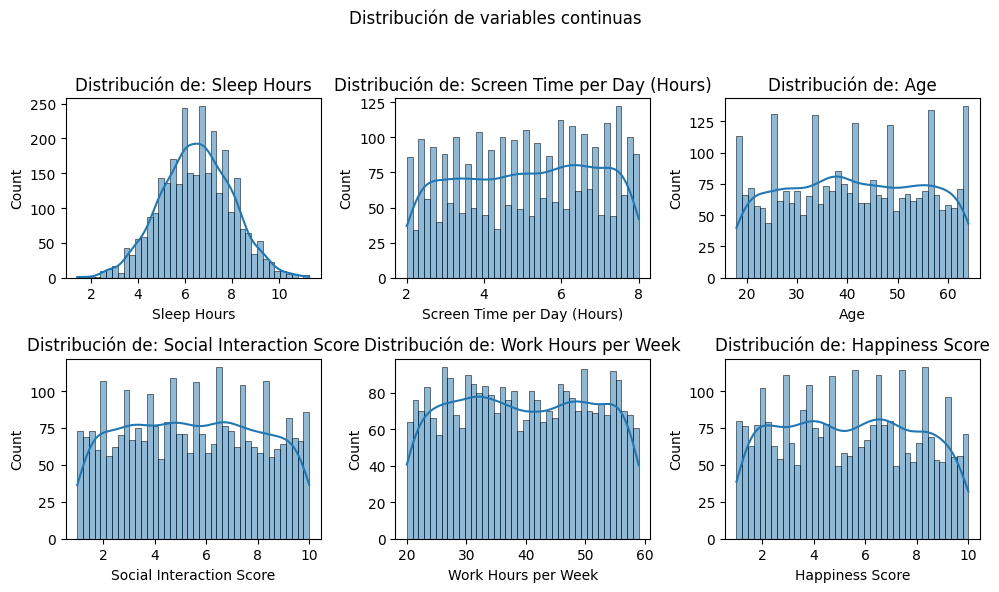

In [ ]:
varContinuas = ["Sleep Hours","Screen Time per Day (Hours)","Age",
                 "Social Interaction Score","Work Hours per Week","Happiness Score"]
fig, posicion = plt.subplots(2, 3, figsize=(10, 6))
fig.suptitle("Distribución de variables continuas")
for indice,variable in enumerate(varContinuas):
  fila, columna = divmod(indice, 3)
  sns.histplot(df[variable], bins=40, kde=True, ax=posicion[fila, columna])
  posicion[fila, columna].set_title(f"Distribución de: {variable}")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

De estos graficos podemos observar lo siguiente:
- En el gráfico de la distribución de las horas de sueño, podemos observar que hay grupos de personas que duermen menos de 6 horas, lo que se considera una cantidad de sueño insuficiente. Hay otro grupo que duerme una cantidad de horas dentro del rango normal o esperado, es decir, entre 6 y 8 horas, y otro grupo que duerme una cantidad de horas un poco mas excesiva, siendo este de más de 10 horas.
- En el gráfico de tiempo frente a la pantalla, se ve que la mayoría tienen un uso moderado del tiempo frente a la pantalla, siendo este de 2 a 6 horas, mientras que hay otro grupo que excede lo recomendado y utiliza hasta 8 horas al dia una pantalla.
- En el gráfico de la Edad, se podría decir que la población es relativamente joven, ya que la mayoría de las personas tienen entre 20 y 50 años, mientras que la minoría tiene más de 60 años.
- En el gráfico de puntuación de la interacción social, se puede ver que muy poca gente llega a los 8 puntos, lo que podría sugerir que una parte de la población tenga un posible nivel de aislamiento social.
- El gráfico de las horas de trabajo semanales, indica que se incluyó en el estudio a personas con empleos parciales, debido a la muestra que tiene menos de 30 horas semanales y de tiempo completo, quienes cuentan con 40 o mas horas de trabajo.
- En el gráfico de la puntuación de la felicidad, se puede ver que las frecuencias son bastante parecidas y que hay bastante gente que tiene  una puntuación de felicidad igual a 10. Por otro lado, quienes tienen valores más bajos de felicidad, pueden estar asociados a condiciones mentales que decaigan su estado de ánimo o a factores como la falta de sueño o la cantidad de tiempo frente a una pantalla.


# **Histograma repecto a las variables categóricas del dataset de estudio**

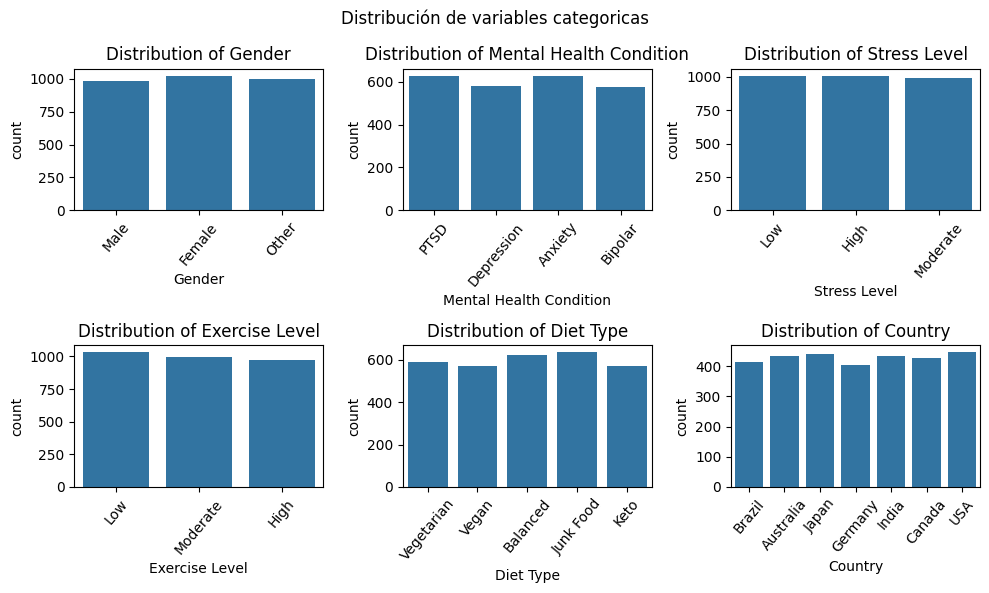

In [ ]:
categoricas = ["Gender", "Mental Health Condition", "Stress Level",
               "Exercise Level","Diet Type","Country"]
fig, posicion = plt.subplots(2, 3, figsize=(10, 6))
fig.suptitle("Distribución de variables categoricas")
for indice,variable in enumerate(categoricas):
    plt.subplot(2, 3, indice+1)
    sns.countplot(x=variable, data=df)
    plt.title(f"Distribution of {variable}")
    plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

De estos histogramas, podemos realizar varias observaciones.

- En la variable relacionada al género con el que las personas se sienten identificadas, la categoría "Female" es la que presenta una mayor frecuencia, lo que indica que hay una predominancia de mujeres en la muestra de estudio.

- En cuanto al nivel de ejercicio, la categoría "low" predomina, por lo que se puede afirmar que la mayoría de la población tiene una tendencia a la inactividad física.

- En el histograma sobre las condiciones de salud mental, se tiene que "PTSD" y "Anxiety" son las dos categorías que presentan una mayor frecuencia, indicando que estas condiciones con las que prevalecen en la población.

- En el histograma del tipo de dieta, se aprecia que "junk food" o comida chatarra, es la categoría que presenta una mayor frecuencia, lo que induce a pensar en que el riesgo de padecer depresión o ansiedad, puede aumentar debido a una afección en la producción de serotonina producida por los excesos de azucares y grasas de estos alimentos.

- En el histograma de los niveles de estrés, se observa que tanto "low", como "moderate" y "high" están bastante parejos, sin embargo, la categoría "low" es la categoría predominante por una minima diferencia.

- En el histograma de País, se puede ver que la mayor agrupación de la población es de USA, seguido de Japón.

# Elección de Variables

Como el proyecto se basa en 4 variables, elegimos descartar las columnas de edad, genero, país, nivel de ejercicio, nivel de estrés, trabajo por semana, nivel de interacción social y puntuación de la felicidad.

Así, nuestras 4 variables son:
- Principales: Condicion de salud mental y tipo de dieta (categóricas)
- Secundarias: Tiempo de pantalla por día y horas de sueño (continuas)

Hemos seleccionado estas variables porque creemos que son las que mejor representan a la población objetivo de nuestro estudio. Dado que el enfoque de nuestra investigación se centra en la relación entre la salud mental, los hábitos alimenticios y los hábitos de exposición a pantallas y descanso, consideramos que el tipo de dieta tiene un impacto directo en la salud mental. En este contexto, la dieta juega un papel crucial en el bienestar general, ya que ciertos patrones alimenticios pueden influir significativamente en el estado emocional y cognitivo de las personas. No consideramos variables culturales o personales, como el país, el género, nivel de estrés o el nivel de ejercicio, porque no están directamente relacionadas con el foco específico de nuestra investigación. Además, variables sociales como el nivel de interacción social y la puntuación de la felicidad son demasiado abstractas y poco concretas para los objetivos específicos de nuestro estudio.

# Variable Principal: Condición de salud mental clasificada en: PTSD, depresión, ansiedad y bipolaridad.

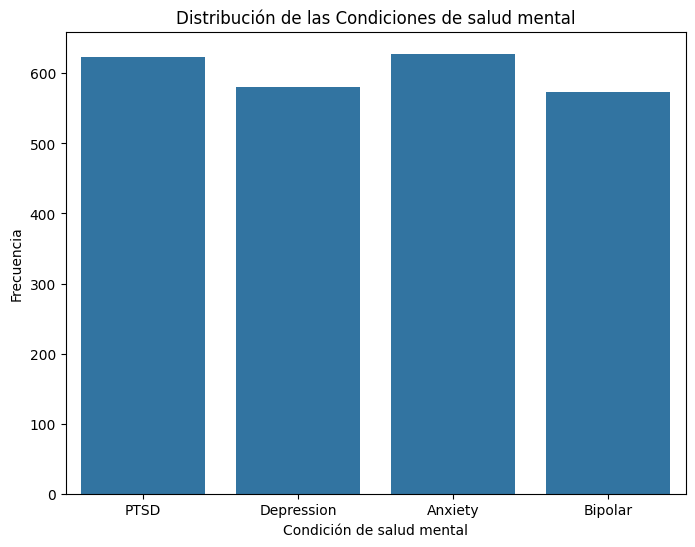

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Mental Health Condition', data=df)
plt.title('Distribución de las Condiciones de salud mental')
plt.xlabel('Condición de salud mental')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de la variable: Condición de salud mental

Este gráfico nos permite visualizar como se distribuyen los distintos tipos de condiciones relacionadas a la salud mental. De esta distribución, se puede apreciar que las distintas condiciones reportadas están relativamente equilibradas y que las más frecuentes son la ansiedad y el estrés postraumático (PTSD), seguidas por la depresión y el transtorno bipolar. A pesar de que hay diferencias mínimas entre las frecuencias, todas las condiciones tienen una presencia igual de importante en el conjunto, lo que sugiere que es clave abordar la salud mental desde una perspectiva mas amplia en vez de centranos en una sola condición o trastorno.



# Variable Principal: Tipo de dieta clasificada en: vegetariano, vegano, balanceado, keto y comida chatarra.

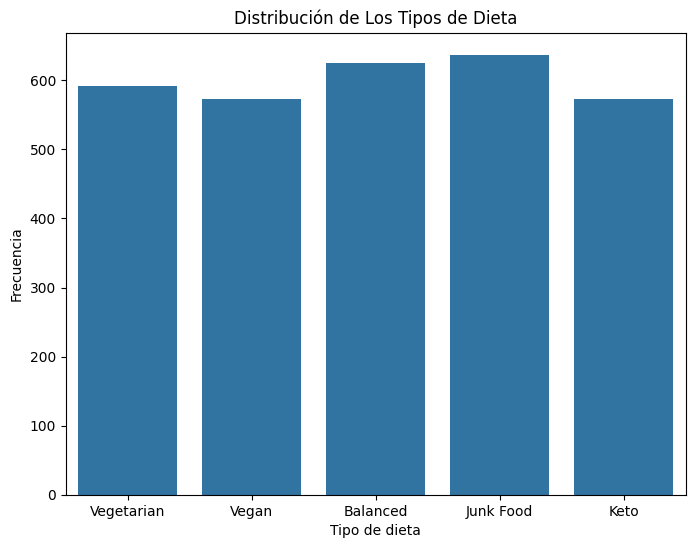

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diet Type', data=df)
plt.title('Distribución de Los Tipos de Dieta')
plt.xlabel('Tipo de dieta')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de la variable: Tipo de dieta.
Este gráfico nos permite visualizar la distribución de los tipos de dieta entre cinco categorías: Vegetarian, Vegan, Balanced, Junk Food y Keto. A simple vista se observa que Junk Food y Balanced son las dietas con mayor frecuencia, mientras que Vegan y Keto presentan las cifras más bajas, aunque no significativamente distantes del resto. La dieta Vegetarian se encuentra en una posición intermedia.

La diferencia entre las categorías no es excesiva, lo que indica que no hay una preferencia abrumadora por un solo tipo de dieta, pero sí se puede notar una ligera inclinación hacia las opciones más equilibradas o indulgentes (Balanced y Junk Food). Esta distribución sugiere que los hábitos alimenticios están relativamente diversificados, aunque con una leve tendencia hacia opciones menos restrictivas o más accesibles, lo cual podría reflejar factores como la disponibilidad o las preferencias personales.

Por otro lado, esta leve tendencia hacia lo que vendría siendo la comida chatarra, también se podría relacionar con condiciones mentales como lo es la depresión, ya que las grasas y azúcares de este tipo de dieta, provocan una afección en la producción de serotonina, es decir, en los neurotransmisores encargados de mantener en equilibrio el estado de ánimo de las personas.

# Variable Secundaria: Promedio de horas de sueño.

Media: 6.48
Mediana: 6.50


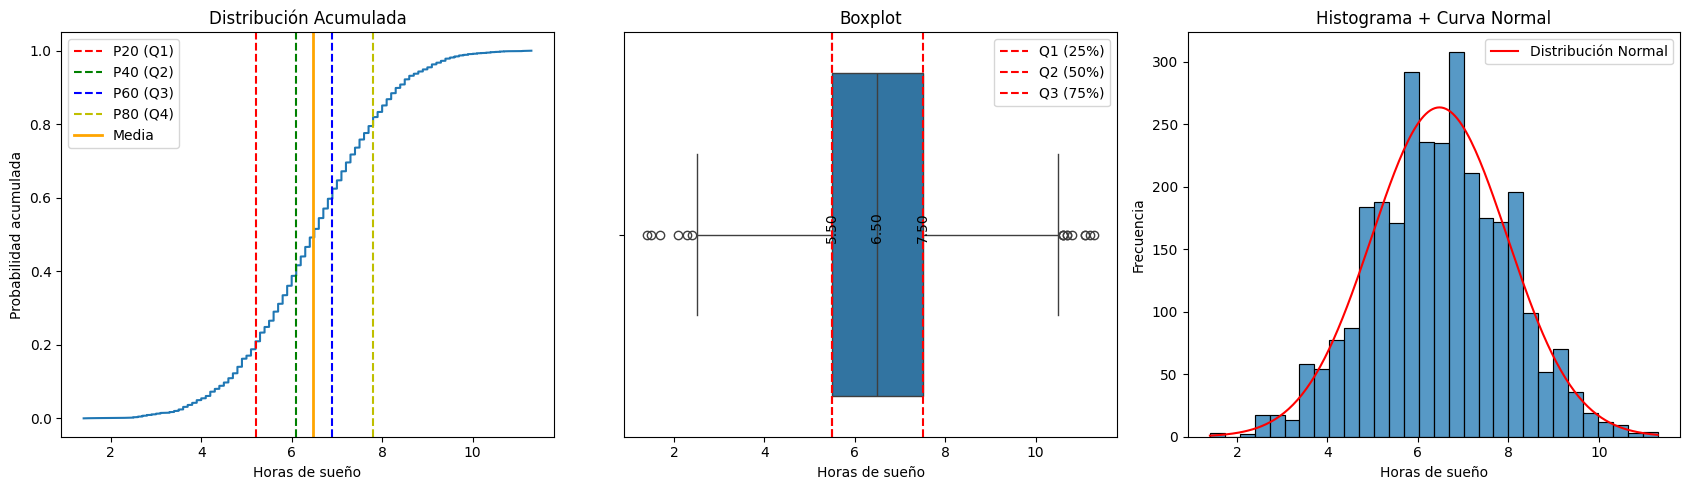

In [ ]:
data = df["Sleep Hours"]
datosOrdenados = np.sort(data)
acumulacion = np.arange(1, len(datosOrdenados) + 1) / len(datosOrdenados) #

media = np.mean(datosOrdenados)
desviacionEstandar = np.std(datosOrdenados)

q1 = np.percentile(datosOrdenados, 25)
q2 = np.percentile(datosOrdenados, 50)
q3 = np.percentile(datosOrdenados, 75)
p20 = np.percentile(datosOrdenados, 20)
p40 = np.percentile(datosOrdenados, 40)
p60 = np.percentile(datosOrdenados, 60)
p80 = np.percentile(datosOrdenados, 80)

fig, posicion = plt.subplots(1, 3, figsize=(17, 5))

# Gráfico 1: Distribución acumulada
posicion[0].plot(datosOrdenados, acumulacion)
posicion[0].axvline(p20, color='r', linestyle='--', label="P20 (Q1)")
posicion[0].axvline(p40, color='g', linestyle='--', label="P40 (Q2)")
posicion[0].axvline(p60, color='b', linestyle='--', label="P60 (Q3)")
posicion[0].axvline(p80, color='y', linestyle='--', label="P80 (Q4)")
posicion[0].axvline(media, color='orange', linestyle='-', label="Media", linewidth=2)
posicion[0].set_xlabel("Horas de sueño")
posicion[0].set_ylabel("Probabilidad acumulada")
posicion[0].set_title("Distribución Acumulada")
posicion[0].legend()

# Gráfico 2: Boxplot
sns.boxplot(x=data, ax=posicion[1])
posicion[1].axvline(q1, color='red', linestyle='--', label="Q1 (25%)")
posicion[1].axvline(q1, color='red', linestyle='--', label="Q2 (50%)")
posicion[1].axvline(q3, color='red', linestyle='--', label="Q3 (75%)")

posicion[1].text(q1, 0.02, f"{q1:.2f}", color='black', ha='center', va='bottom', rotation=90)
posicion[1].text(q2, 0.02, f"{q2:.2f}", color='black', ha='center', va='bottom', rotation=90)
posicion[1].text(q3, 0.02, f"{q3:.2f}", color='black', ha='center', va='bottom', rotation=90)

posicion[1].set_xlabel("Horas de sueño")
posicion[1].set_title("Boxplot")
posicion[1].legend()

# Gráfico 3: Histograma con curva normal
sns.histplot(data, kde=False, stat="count", bins=30, ax=posicion[2])
puntosCurva = np.linspace(data.min(), data.max(), 200)
normal_dist = norm.pdf(puntosCurva, media, desviacionEstandar)*len(data)*(data.max()-data.min())/30
posicion[2].plot(puntosCurva, normal_dist, color='red', label='Distribución Normal')
posicion[2].set_xlabel("Horas de sueño")
posicion[2].set_ylabel("Frecuencia")
posicion[2].set_title("Histograma + Curva Normal")
posicion[2].legend()

promedio = data.mean()
mediana = data.median()

print(f"Media: {promedio:.2f}")
print(f"Mediana: {mediana:.2f}")

plt.tight_layout()
plt.show()


# Análisis de la variable: Horas de sueño.

Ambos gráficos nos muestran la distribución de Horas de sueño de los individuos.  
La curva muestra un crecimiento progresivo, indicando que la mayoría de las personas tienen entre 4 y 8 horas de sueño, ya que la pendiente es más pronunciada en esa región. La curva se estabiliza rápidamente después de las 8 horas, lo que sugiere que hay menos personas que duermen más de ese umbral. Es posible que la distribución esté sesgada hacia la izquierda (valores más bajos), lo que indica que algunos individuos duermen significativamente menos que el promedio.


Idea:

La curva acumulada muestra un crecimiento progresivo más notorio entre las 4 y 8 horas de sueño, indicando (debido a que la pendiente es más pronunciada en esta región) que la mayoria de personas se concentra en este rango. A partir de las 8 horas de sueño la curva se estabiliza o aplana, lo que sugiere que hay menos personas que duermen más de ese umbral. Por otro lado, se puede observar que la distribución está sesgada a la izquierda (valores más bajos), lo que revela que algunos individuos duermen significativamente menos que el promedio, llegando a un extremo de menos de 2 horas de sueño diarias.

El Boxplot por su parte, refuerza esta idea, ya que se observa una distribucion con múltiples outliers en ambos extremos. Además, como la caja representa los rangos intercuartílicos Q1 a Q3, también se confirma que la mayoria de las personas duermen aproximadamente en ese rango.

Por último, el histograma de la curva normal muestra que la distribucion de las horas de sueño se acerca visualmente a una distribución normal, aunque con algunas asimetrías. Esto, junto a la informacion entregada por el boxplot, nos permite deducir que, a pesar de que la mayoría de los datos siguen un patrón "normal", hay una cierta cantidad de gente, que aunque sea la minoría, tiene hábitos de sueño anormales que afectan la media de los datos.

# Variable Secundaria: Promedio de horas al día frente a la pantalla.

Media: 5.09
Mediana: 5.10


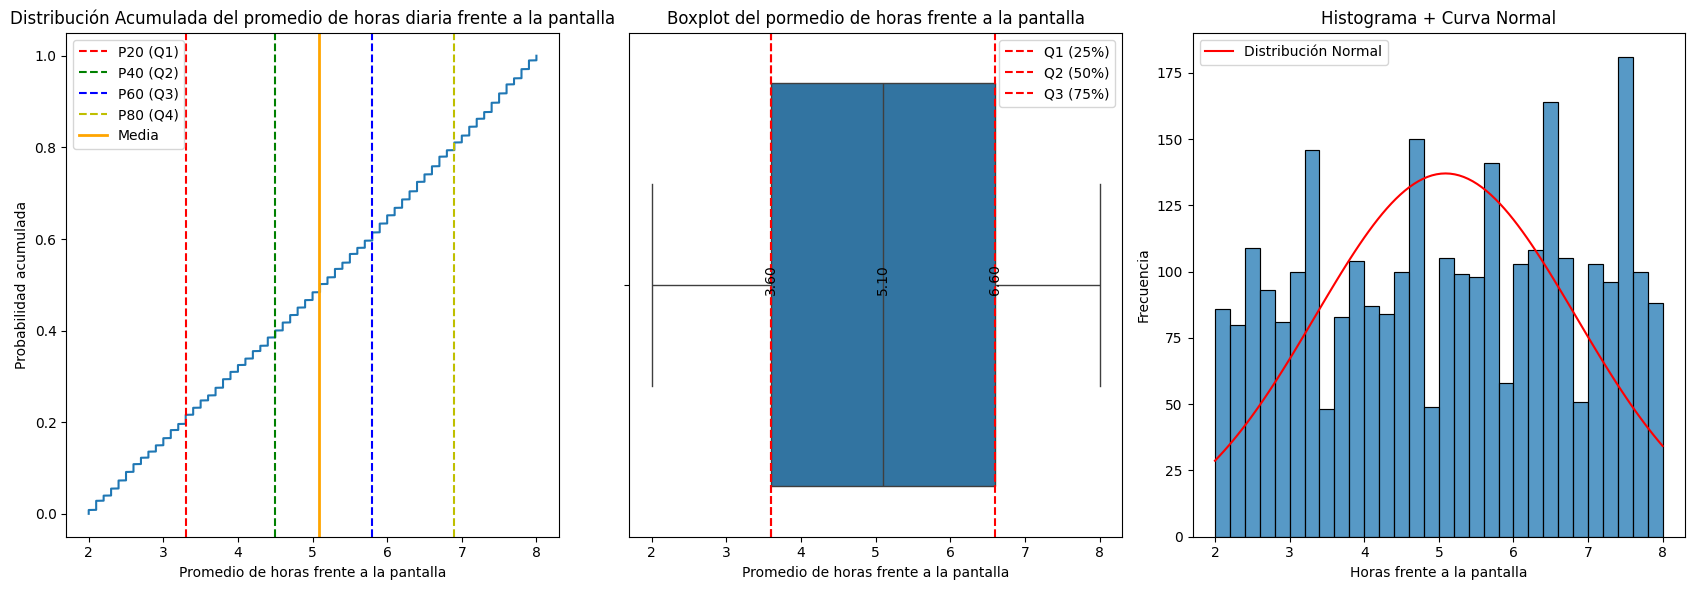

In [ ]:
data = df["Screen Time per Day (Hours)"]
datosOrdenados = np.sort(data) #ordeno los datos de menor a mayor
acumulacion = np.arange(1,len(datosOrdenados) + 1) / len(datosOrdenados)

media = np.mean(datosOrdenados)

q1 = np.percentile(datosOrdenados, 25)
q2 = np.percentile(datosOrdenados, 50)
q3 = np.percentile(datosOrdenados, 75)
p20 = np.percentile(datosOrdenados, 20)
p40 = np.percentile(datosOrdenados, 40)
p60 = np.percentile(datosOrdenados, 60)
p80 = np.percentile(datosOrdenados, 80)

fig, posicion = plt.subplots(1, 3, figsize=(17, 6))
desviacionEstandar = np.std(datosOrdenados)

# Gráfico 1: Distribución acumulada
posicion[0].plot(datosOrdenados, acumulacion)
posicion[0].axvline(p20, color='r', linestyle='--', label="P20 (Q1)")
posicion[0].axvline(p40, color='g', linestyle='--', label="P40 (Q2)")
posicion[0].axvline(p60, color='b', linestyle='--', label="P60 (Q3)")
posicion[0].axvline(p80, color='y', linestyle='--', label="P80 (Q4)")
posicion[0].axvline(media, color='orange', linestyle='-', label="Media", linewidth=2)
posicion[0].set_xlabel("Promedio de horas frente a la pantalla")
posicion[0].set_ylabel("Probabilidad acumulada")
posicion[0].set_title("Distribución Acumulada del promedio de horas diaria frente a la pantalla")
posicion[0].legend()

# Gráfico 2: Boxplot
sns.boxplot(x=data, ax=posicion[1])
posicion[1].axvline(q1, color='r', linestyle='--', label="Q1 (25%)")
posicion[1].axvline(q1, color='r', linestyle='--', label="Q2 (50%)")
posicion[1].axvline(q3, color='r', linestyle='--', label="Q3 (75%)")
posicion[1].text(q1, 0.02, f"{q1:.2f}", color='black', ha='center', va='bottom', rotation=90)
posicion[1].text(q2, 0.02, f"{q2:.2f}", color='black', ha='center', va='bottom', rotation=90)
posicion[1].text(q3, 0.02, f"{q3:.2f}", color='black', ha='center', va='bottom', rotation=90)

posicion[1].set_xlabel("Promedio de horas frente a la pantalla")
posicion[1].set_title("Boxplot del pormedio de horas frente a la pantalla")
posicion[1].legend()

# Gráfico 3: Histograma + curva
sns.histplot(data, kde=False, stat="count", bins=30, ax=posicion[2])
puntosCurva = np.linspace(data.min(), data.max(), 100)
normal_dist = norm.pdf(puntosCurva, media, desviacionEstandar)*len(data)*(data.max()-data.min())/30
posicion[2].plot(puntosCurva, normal_dist, color='red', label='Distribución Normal')
posicion[2].set_xlabel("Horas frente a la pantalla")
posicion[2].set_ylabel("Frecuencia")
posicion[2].set_title("Histograma + Curva Normal")
posicion[2].legend()

promedio = data.mean()
mediana = data.median()

print(f"Media: {promedio:.2f}")
print(f"Mediana: {mediana:.2f}")

plt.tight_layout()
plt.show()

# Análisis de la variable: Tiempo de pantalla por día.

En el grafico de frecuencias acumuladas, se observa una distribución relativamente continua y progresiva del tiempo promedio de horas diarias frente a la pantalla. No hay grandes saltos bruscos, lo que sugiere que los datos están distribuidos de manera bastante uniforme. Alrededor del 80% de las personas pasan menos de 7 horas al día frente a la pantalla, mientras que pocas personas superan las 8 horas, lo que indica un uso controlado de las pantallas.

El boxplot sugiere una distribución moderadamente simétrica con una ligera tendencia a valores altos, se observa que la caja se extiende más hacia valores superiores. La caja representa el rango intercuartílico, lo que indica que la mayoría de los valores están concentrados entre aproximadamente 3 y 7 horas. En comparación al boxplot de las horas de sueño promedio, el boxplot de las horas frente a la pantalla no presenta outliers, lo que indica que no se tienen valores atípicos extremos.

El histograma refleja una  distribución irregular que sugiere que los datos no siguen una distribución normal a pesar de que la media y la mediana tienen valores similares (5.09 y 5.10 respectivamente). Además, la curva normal superpuesta no se ajusta a las barras del gráfico, en especial en los extremos y en algunos puntos donde la frecuencia es mucho mayor o menor a la curva normal. Esto mismo se puede ver reflejado en el boxplot, ya que la caja está ligeramente extendida hacia valores altos, sugiriendo una simetría hacia la derecha o un leve sesgo positivo que no presenta valores extremos debido a la ausencia de outliers, como se menciona anteriormente.

# **Elección método de limpieza del dataset**

Para la detección y eliminación de outliers del dataset, se utilizará el **método del Rango intercuartil** (IQR) con el **criterio de 1.5**. Este enfoque es bastante utilizado para detectar y eliminar valores atípicos sin eliminar excesivamente valores que pueden ser relevantes para el estudio.

Este se calcula de la siguiente manera:

$IQR = Q_{3}-Q_{1}$

Límite inferior = $Q_{1} - 1.5 * IQR$

Límite superior = $Q_{3} + 1.5 * IQR$

Donde $Q_{1}$ corresponde al primer cuartil, $Q_{3}$ al tercer cuartil y los límites inferior y superior a los valores mínimos y máximos que delimitan cuando un dato pasa a ser un outlier, es decir, si hay un valor menor al limite inferior o mayor al limite superior, este es considerado como un valor atípico.

In [ ]:
variablesEscogidas = ["Mental Health Condition","Diet Type","Sleep Hours","Screen Time per Day (Hours)"]
df = df[variablesEscogidas]
varContinuas = ["Sleep Hours","Screen Time per Day (Hours)"]

for columna in varContinuas:
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1
  LimInferior = Q1 - 1.5*IQR
  LimSuperior = Q3 + 1.5*IQR

  df = df[(df[columna] >= LimInferior) & (df[columna] <= LimSuperior)]

Luego, para visualizar los valores NaN contenidos en el dataset, utilizaremos el siguiente comando de la librería pandas:

In [ ]:
print(df.isnull().sum())

Mental Health Condition        591
Diet Type                        0
Sleep Hours                      0
Screen Time per Day (Hours)      0
dtype: int64


Para la eliminación de estos valores, se utilizará el siguiente comando perteneciente a la misma librería:

In [ ]:
df = df.dropna()

Finalmente, la cantidad de datos contenidos en el dataset tras la limpieza de outliers y valores NaN es de:

In [ ]:
print(f"Cantidad de datos: {df.shape[0]}")

Cantidad de datos: 2393


# **Una vez limpiado el dataset, las variables principales y secundarias, quedan registradas de la siguiente manera:**

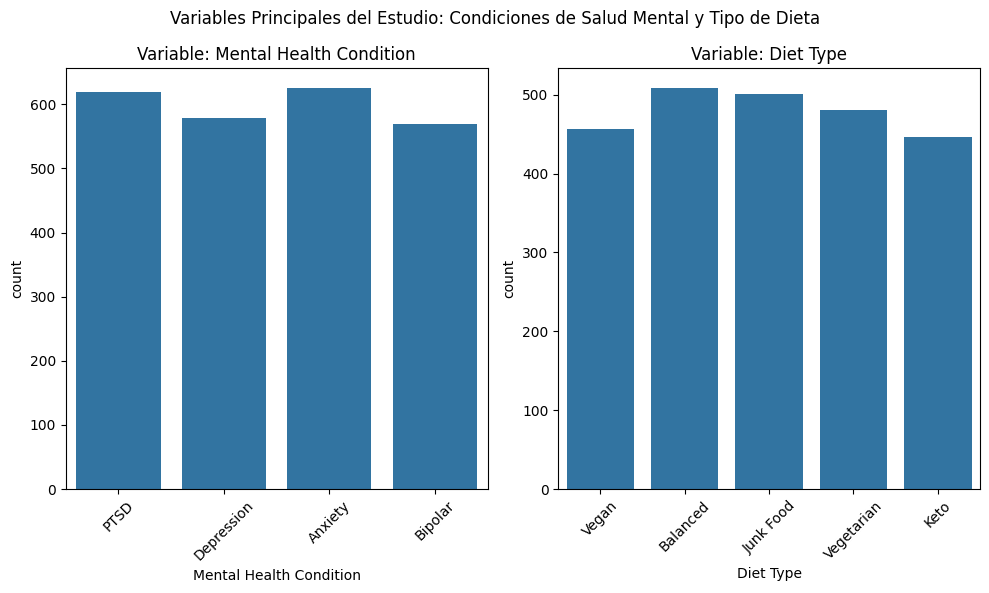

In [ ]:
varsPrincipales = ["Mental Health Condition", "Diet Type"]
plt.figure(figsize=(10, 6))
plt.suptitle("Variables Principales del Estudio: Condiciones de Salud Mental y Tipo de Dieta")
for indice, variable in enumerate(varsPrincipales):
    plt.subplot(1, 2, indice+1)
    sns.countplot(x=variable, data=df)
    plt.title(f"Variable: {variable}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

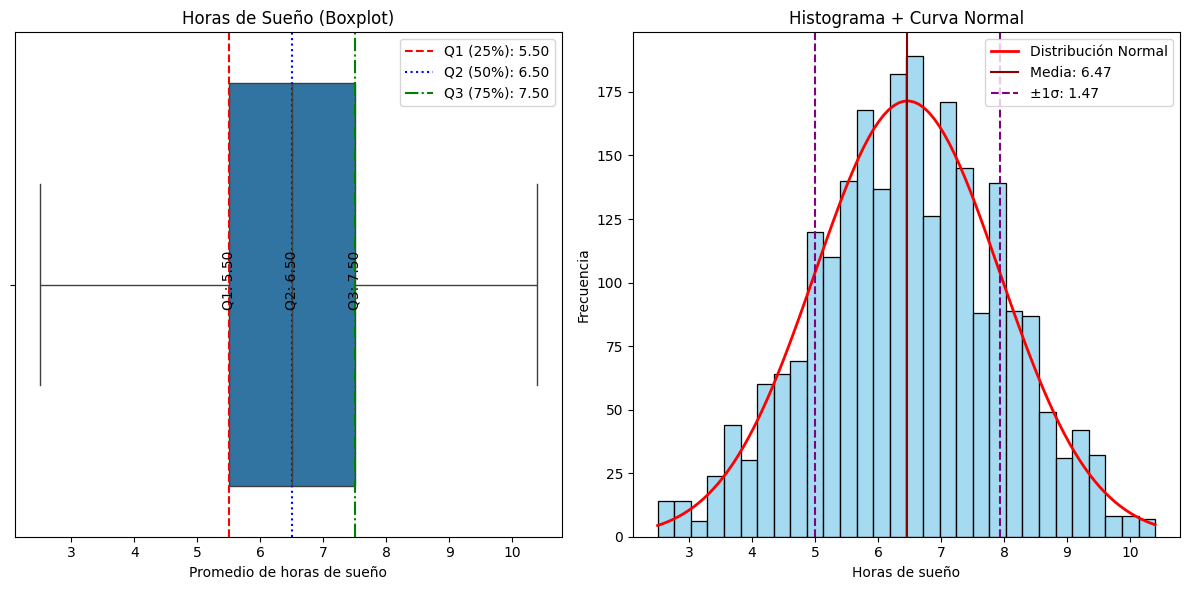

In [ ]:
fig, posicion = plt.subplots(1, 2, figsize=(12, 6))

data = df["Sleep Hours"]
datosOrdenados = np.sort(data)
acumulacion = np.arange(1, len(datosOrdenados) + 1) / len(datosOrdenados)

media = np.mean(data)
desvEst = np.std(data)
q1, q2, q3 = np.percentile(data, [25, 50, 75])

sns.boxplot(x=data, ax=posicion[0])
posicion[0].axvline(q1, color='red', linestyle='--', label=f"Q1 (25%): {q1:.2f}")
posicion[0].axvline(q2, color='blue', linestyle=':', label=f"Q2 (50%): {q2:.2f}")
posicion[0].axvline(q3, color='green', linestyle='-.', label=f"Q3 (75%): {q3:.2f}")

posicion[0].text(q1, 0.05, f"Q1: {q1:.2f}", color='black', ha='center', va='bottom', rotation=90)
posicion[0].text(q2, 0.05, f"Q2: {q2:.2f}", color='black', ha='center', va='bottom', rotation=90)
posicion[0].text(q3, 0.05, f"Q3: {q3:.2f}", color='black', ha='center', va='bottom', rotation=90)

posicion[0].set_xlabel("Promedio de horas de sueño")
posicion[0].set_title("Horas de Sueño (Boxplot)")
posicion[0].legend()

sns.histplot(data, kde=False, stat="count", bins=30, ax=posicion[1], color='skyblue', edgecolor='black')

puntosCurva = np.linspace(data.min(), data.max(), 100)
normal_dist = norm.pdf(puntosCurva, media, desvEst)*len(data)*(data.max()-data.min())/30
posicion[1].plot(puntosCurva, normal_dist, color='red', linewidth=2, label='Distribución Normal')

posicion[1].axvline(media, color='darkred', linestyle='-', label=f'Media: {media:.2f}')
posicion[1].axvline(media - desvEst, color='purple', linestyle='--', label=f'±1σ: {desvEst:.2f}')
posicion[1].axvline(media + desvEst, color='purple', linestyle='--')

posicion[1].set_xlabel("Horas de sueño")
posicion[1].set_ylabel("Frecuencia")
posicion[1].set_title("Histograma + Curva Normal")
posicion[1].legend()

plt.tight_layout()
plt.show()

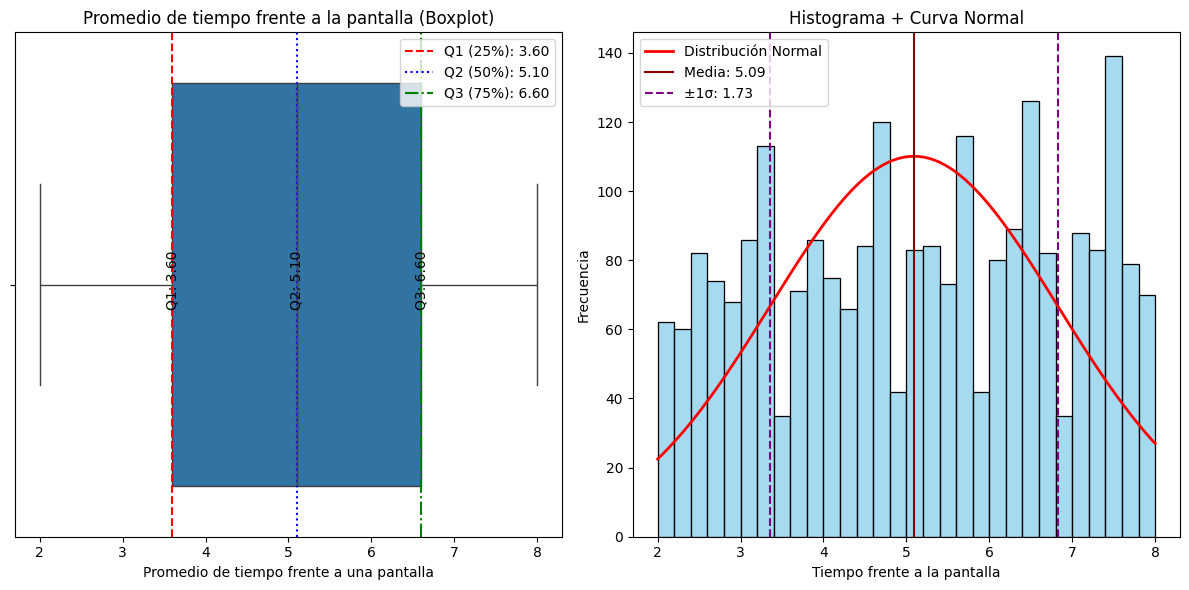

In [ ]:
fig, posicion = plt.subplots(1, 2, figsize=(12, 6))

data = df["Screen Time per Day (Hours)"]
datosOrdenados = np.sort(data)
acumulacion = np.arange(1, len(datosOrdenados) + 1) / len(datosOrdenados)

media = np.mean(data)
desvEst = np.std(data)
q1, q2, q3 = np.percentile(data, [25, 50, 75])

sns.boxplot(x=data, ax=posicion[0])
posicion[0].axvline(q1, color='red', linestyle='--', label=f"Q1 (25%): {q1:.2f}")
posicion[0].axvline(q2, color='blue', linestyle=':', label=f"Q2 (50%): {q2:.2f}")
posicion[0].axvline(q3, color='green', linestyle='-.', label=f"Q3 (75%): {q3:.2f}")

posicion[0].text(q1, 0.05, f"Q1: {q1:.2f}", color='black', ha='center', va='bottom', rotation=90)
posicion[0].text(q2, 0.05, f"Q2: {q2:.2f}", color='black', ha='center', va='bottom', rotation=90)
posicion[0].text(q3, 0.05, f"Q3: {q3:.2f}", color='black', ha='center', va='bottom', rotation=90)

posicion[0].set_xlabel("Promedio de tiempo frente a una pantalla")
posicion[0].set_title("Promedio de tiempo frente a la pantalla (Boxplot)")
posicion[0].legend()

sns.histplot(data, kde=False, stat="count", bins=30, ax=posicion[1], color='skyblue', edgecolor='black')
puntosCurva = np.linspace(data.min(), data.max(), 100)
normal_dist = norm.pdf(puntosCurva, media, desvEst)*len(data)*(data.max()-data.min())/30
posicion[1].plot(puntosCurva, normal_dist, color='red', linewidth=2, label='Distribución Normal')

posicion[1].axvline(media, color='darkred', linestyle='-', label=f'Media: {media:.2f}')
posicion[1].axvline(media - desvEst, color='purple', linestyle='--', label=f'±1σ: {desvEst:.2f}')
posicion[1].axvline(media + desvEst, color='purple', linestyle='--')

posicion[1].set_xlabel("Tiempo frente a la pantalla")
posicion[1].set_ylabel("Frecuencia")
posicion[1].set_title("Histograma + Curva Normal")
posicion[1].legend()

plt.tight_layout()
plt.show()

Finalmente, la hipótesis sobre la cual se desarrollará nuestro proyecto plantea la interrogante de si **las personas que llevan un tipo de dieta saludable, duermen las horas necesarias y pasan menos tiempo frente a pantallas presentan una menor probabilidad de padecer alguna condición mental, en comparación a aquellas personas que mantienen hábitos menos equilibrados o no**.

Esta hipótesis surge del reconocimiento del impacto que tienen sobre la salud mental de una persona, sus hábitos de vida. Un buen descanso, una alimentación balanceada y un uso responsable de pantallas, son factores que pueden proteger la salud mental de cierta manera, por lo que, el impacto de este estudio, recae en la posibilidad de encontrar patrones entre estas 4 variables y entender las relaciones existentes entre estas, para lograr una mayor comprensión de como podemos lograr un mejor autocuidado.

# **ENTREGA 2**

# Elección de variables a simular

Para esta entrega se seleccionaron las variables "Screen Time per Day (hours)" y "Sleep hours". Esto dado a su relevancia directa con el estilo de vida moderno y su notorio impacto en la salud mental, el cual es el centro de nuestra hipótesis.
Ambas variables son continuas, por lo tanto, se puede aplicar un modelamiento probabilístico y una estimación de parámetros bastante precisos debido a su cuatificación y a su buena distribución en el dataset.

# ¿A qué tipo de distribución podemos asemejar estas variables?

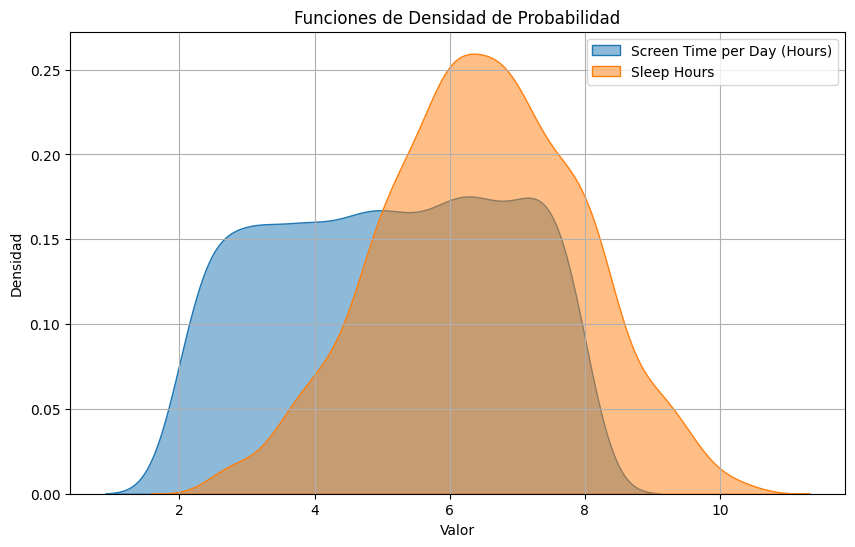

In [ ]:
# Visualizar la FDP de cada variable por separado
plt.figure(figsize=(10, 6))

# FDP para "Screen Time per Day (Hours)"
sns.kdeplot(df["Screen Time per Day (Hours)"], label="Screen Time per Day (Hours)", fill=True, alpha=0.5)

# FDP para "Sleep Hours"
sns.kdeplot(df["Sleep Hours"], label="Sleep Hours", fill=True, alpha=0.5)

plt.title("Funciones de Densidad de Probabilidad")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()

Para asociar las variables a la distribución teórica que mejor se ajuste a ellas, primero se utilizará la librería Spicy, la cuál nos mostrará diferentes distribuciones teóricas como la normal, exponencial, gamma, beta y uniforme, sobre cada variable para compararla con la grafica de la curva de distribución empírica (KDE) y asi visualizar los comportamientos. Luego, mediante el criterio de información de Akaike (AIC), se evaluará que tanto se ajusta la distribución a nuestros datos.

Este criterio, es una métrica que evalúa la calidad de un modelo probabilístico, la bondad del ajuste, es decir, que tan bien describe el modelo a los datos observados, y la complejidad, que se refiere al números de parametros "k" del modelo.

Este criterio se calcula de la siguiente manera:

$AIC = 2k - 2ln (L)$

Siendo k el número de parámetros como se mencionó anteriormente y L la verosimilitud máxima. Cuánto menor sea el AIC, mejor va a ser el modelo, por lo que la elección de la distribución asociada a cada variable, será la correspondiente al menor de los valores que nos entregue el criterio.

# Variable "Sleep Hours"

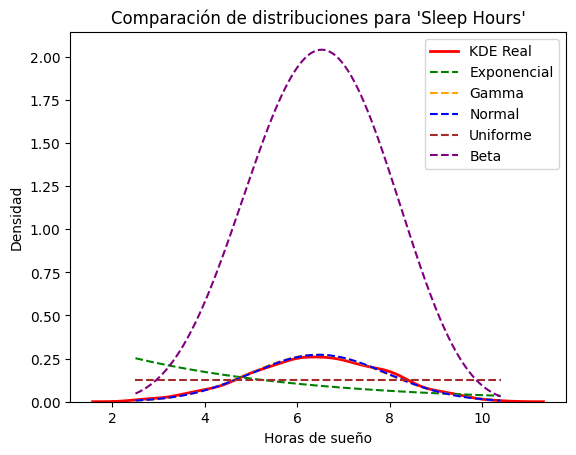

In [ ]:
sleep_data = df["Sleep Hours"]
x = np.linspace(sleep_data.min(), sleep_data.max(), 1000) # array de 1000 puntos espaciados para graficar las distribuciones teoricas

#KDE
sns.kdeplot(sleep_data, label="KDE Real", color="red", linewidth=2)

# Distribuciones:
# Exponencial
loc_exp, scale_exp = expon.fit(sleep_data) #con expon.fit de spicy, se estiman los parametros de la distribucion exp que mejor se ajustan a la kde
plt.plot(x, expon.pdf(x, loc=loc_exp, scale=scale_exp), label="Exponencial", linestyle="--", color="green") #con expon.pdf se calcula el valor de la fdp de la exp en cada punto

#para estas se realiza lo mismo que para la exponencial, solo que aplicado a cada distribucion
# Gamma
a_gamma, loc_gamma, scale_gamma = gamma.fit(sleep_data)
plt.plot(x, gamma.pdf(x, a_gamma, loc=loc_gamma, scale=scale_gamma), label="Gamma", linestyle="--", color="orange")

# Normal
mu, sigma = norm.fit(sleep_data)
plt.plot(x, norm.pdf(x, mu, sigma), label="Normal", linestyle="--", color="blue")

# Uniforme
loc_uni, scale_uni = uniform.fit(sleep_data)
plt.plot(x, uniform.pdf(x, loc_uni, scale_uni), label="Uniforme", linestyle="--", color="brown")

# Beta
# En este caso, se ajustan los valores para que esten entre 0 y 1
scaled_data = (sleep_data - sleep_data.min()) / (sleep_data.max() - sleep_data.min()) #pasa los datos originales a un rango 0-1 con la formula
a_beta, b_beta, loc_beta, scale_beta = beta.fit(scaled_data) #se ajustan los parametros de la beta a los datos escalados
x_beta = np.linspace(0, 1, 1000) #se crean los 1000 puntos espaciados para la grafica de la distribucion
plt.plot(
    sleep_data.min() + x_beta * (sleep_data.max() - sleep_data.min()),
    beta.pdf(x_beta, a_beta, b_beta, loc=loc_beta, scale=scale_beta),
    label="Beta", linestyle="--", color="purple"
)

plt.title("Comparación de distribuciones para 'Sleep Hours'")
plt.xlabel("Horas de sueño")
plt.ylabel("Densidad")
plt.legend()
plt.show()

In [ ]:
n = len(sleep_data)
aic_results = {} # Lista para almacenar los resultados

# todos los calculos se hacen de la misma manera
# se estiman los parametros de la distribucion
# se calcula el logaritmo de la fdp para cada punto de los datos, usando los parametros
# k = num de parametros
# se aplica la formula de aic

#Normal
mu, sigma = norm.fit(sleep_data)
log_likelihood = np.sum(norm.logpdf(sleep_data, mu, sigma))
k = 2  # mu y sigma
aic_results["Normal"] = 2 * k - 2 * log_likelihood

#Exponencial
loc_exp, scale_exp = expon.fit(sleep_data)
log_likelihood = np.sum(expon.logpdf(sleep_data, loc_exp, scale_exp))
k = 2  # loc y scale
aic_results["Exponencial"] = 2 * k - 2 * log_likelihood

#Gamma}
a_gamma, loc_gamma, scale_gamma = gamma.fit(sleep_data)
log_likelihood = np.sum(gamma.logpdf(sleep_data, a_gamma, loc=loc_gamma, scale=scale_gamma))
k = 3  # a, loc, scale
aic_results["Gamma"] = 2 * k - 2 * log_likelihood

#Uniforme
loc_uni, scale_uni = uniform.fit(sleep_data)
log_likelihood = np.sum(uniform.logpdf(sleep_data, loc_uni, scale_uni))
k = 2  # loc y scale
aic_results["Uniforme"] = 2 * k - 2 * log_likelihood

sorted_aic = sorted(aic_results.items(), key=lambda x: x[1])
for dist, aic in sorted_aic:
    print(f"{dist}: AIC = {aic:.2f}")

Normal: AIC = 8626.40
Gamma: AIC = 8632.20
Uniforme: AIC = 9896.01
Exponencial: AIC = 11385.24


En el caso de esta variable, se puede observar en el gráfico que las distribuciones que más se acercan a la distribución de los datos son principalmente la gamma y la normal, seguidas de la exponencial y la uniforme, mientras que la que más se aleja, es la distribución beta. Con el cálculo del AIC, sobre las 4 distribuciones más cercanas a nuestros datos, se obtuvo que la distribución Normal es la que más se ajusta ya que es el resultado más pequeño de la aplicación de este criterio. Por lo tanto, **la variable "Sleep Hours" se asemeja a una distribucion Normal.**

# Variable: "Screen Time per Day (Hours)"

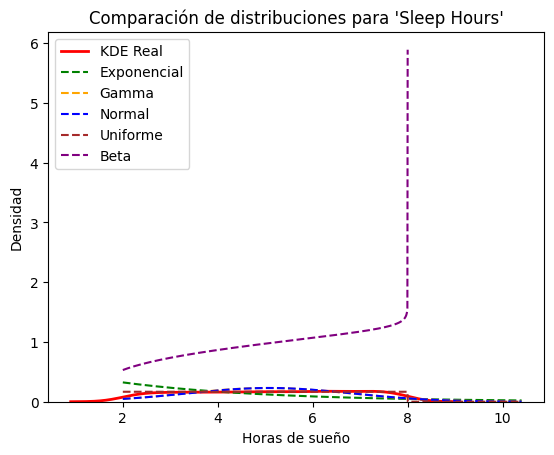

In [ ]:
screen_data = df["Screen Time per Day (Hours)"]
x = np.linspace(screen_data.min(), sleep_data.max(), 1000)

# KDE
sns.kdeplot(screen_data, label="KDE Real", color="red", linewidth=2)

#Distribuciones:
# Exponencial
loc_exp, scale_exp = expon.fit(screen_data)
plt.plot(x, expon.pdf(x, loc=loc_exp, scale=scale_exp), label="Exponencial", linestyle="--", color="green")

# Gamma
a_gamma, loc_gamma, scale_gamma = gamma.fit(screen_data)
plt.plot(x, gamma.pdf(x, a_gamma, loc=loc_gamma, scale=scale_gamma), label="Gamma", linestyle="--", color="orange")

# Normal
mu, sigma = norm.fit(screen_data)
plt.plot(x, norm.pdf(x, mu, sigma), label="Normal", linestyle="--", color="blue")

# Uniforme
loc_uni, scale_uni = uniform.fit(screen_data)
plt.plot(x, uniform.pdf(x, loc_uni, scale_uni), label="Uniforme", linestyle="--", color="brown")

# Beta
scaled_data = (screen_data - screen_data.min()) / (screen_data.max() - screen_data.min())
a_beta, b_beta, loc_beta, scale_beta = beta.fit(scaled_data)
x_beta = np.linspace(0, 1, 1000)
plt.plot(
    screen_data.min() + x_beta * (screen_data.max() - screen_data.min()),
    beta.pdf(x_beta, a_beta, b_beta, loc=loc_beta, scale=scale_beta),
    label="Beta", linestyle="--", color="purple"
)

plt.title("Comparación de distribuciones para 'Sleep Hours'")
plt.xlabel("Horas de sueño")
plt.ylabel("Densidad")
plt.legend()
plt.show()

In [ ]:
n = len(screen_data)
aic_results_screen = {}

#normal
mu, sigma = norm.fit(screen_data)
log_likelihood = np.sum(norm.logpdf(screen_data, mu, sigma))
k = 2  # mu y sigma
aic_results_screen["Normal"] = 2 * k - 2 * log_likelihood

#exponencial
loc_exp, scale_exp = expon.fit(screen_data)
log_likelihood = np.sum(expon.logpdf(screen_data, loc_exp, scale_exp))
k = 2
aic_results_screen["Exponencial"] = 2 * k - 2 * log_likelihood

#gamma
a_gamma, loc_gamma, scale_gamma = gamma.fit(screen_data)
log_likelihood = np.sum(gamma.logpdf(screen_data, a_gamma, loc=loc_gamma, scale=scale_gamma))
k = 3
aic_results_screen["Gamma"] = 2 * k - 2 * log_likelihood

#uniforme
loc_uni, scale_uni = uniform.fit(screen_data)
log_likelihood = np.sum(uniform.logpdf(screen_data, loc_uni, scale_uni))
k = 2
aic_results_screen["Uniforme"] = 2 * k - 2 * log_likelihood

#beta
log_likelihood = np.sum(beta.logpdf(scaled_data, a_beta, b_beta, loc=loc_beta, scale=scale_beta))
k = 4
aic_results_screen["Beta"] = 2 * k - 2 * log_likelihood

sorted_aic_screen = sorted(aic_results_screen.items(), key=lambda x: x[1])
for dist, aic in sorted_aic_screen:
    print(f"{dist}: AIC = {aic:.2f}")


Beta: AIC = 189.78
Uniforme: AIC = 8579.36
Normal: AIC = 9430.44
Gamma: AIC = 9435.03
Exponencial: AIC = 10191.52


Para esta segunda variable, se puede ver en el gráfico que todas las distribuciones teóricas se asemejan bastante a la distribución de los datos, por lo que, el cálculo del AIC se realizó para cada una. El resultado de esto, fue que la distribución Beta es la que más se ajusta, ya que es la que obtuvo el menor valor con este criterio. Así, la variable "Screen Time per Day (Hours)" se asocia a una distribución Beta.

# Transformación Inversa

## ¿Qué es?

El método de la transformación inversa es una técnica fundamental en la generación de números aleatorios a partir de una distribución de probabilidad específica. Se basa principalmente en el hecho de que cualquier variable aleatoria continua con función de distribución acumulada (CDF) $F(x)$, puede ser generada transformando una variable aleatoria uniforme $ U \sim \mathcal{U}(0,1) $ mediante la **inversa de su CDF**, es decir, $$ X = F^{-1}(U) $$

En este contexto, el valor generado $X$ seguirá la distribución deseada.

## ¿Para qué nos sirve?

Para poder simular datos que sigan la misma distribución que los datos reales, luego de ser ajustados a un modelo probabilístico como se mencionó anteriormente. En nuestro contexto, la transformacion inversa será útil para generar las simulaciones de la variable "Screen Time per Day (Hours)", la cual se ajusta a una distribución que tiene una inversa definida, por lo que se puede aplicar el método directamente. Por otro lado, a la variable "Sleep Hours", que se ajusta a la distribución normal, no se le puede aplicar este método de forma directa ya que la función inversa de su distribución de probabilidad no tiene una expresión cerrada.

# Caso de la variable "Sleep Hours"

Para realizar las simulaciones, se utilizará el método de Box-Muller, el cual al ser un método alternativo que permite simular variables normales estándar a partir de dos variables uniformes independientes, transformará estos valores, a través de funciones trigonométricas y logarítmicas para producir datos que sigan una distribucion normal, lo cual lo hace muy útil a la hora de simular este tipo de comportamientos en ausencia de su inversa directa. Estas funciones se representan de la siguiente manera:

$Z_1 = \sqrt{-2 \ln(U_1)} \cdot \cos(2\pi U_2), \quad Z_2 = \sqrt{-2 \ln(U_1)} \cdot \sin(2\pi U_2)$

Estos valores de $Z_1$ y $Z_2$, siguen una distribución normal estándar $N(0,1)$ y son independientes. Por lo tanto, cualquiera de ellos se puede utilizar para obtener una variable normal mediante la transformación:

$X = \mu + \sigma \cdot Z$

Esto permite obtener dos valores normales por cada par de números aleatorios uniformes $(U_1, U_2)$:
$X_1 = \mu + \sigma Z_1, \quad X_2 = \mu + \sigma Z_2$

Ambos valores $X_1$ y $X_2$ serán independientes y seguirán la distribución $\mathcal{N}(\mu, \sigma^2)$.


## Aplicacion del método:

Primero, aproximamos los valores de la media y desviación estandar:

In [ ]:
mu1, sigma1 = stats.norm.fit(sleep_data)
print(f"Media (mu): {mu1:.2f}")
print(f"Desviación estándar (sigma): {sigma1:.2f}")

Media (mu): 6.47
Desviación estándar (sigma): 1.47


Obteniendo la siguiente función:

$f(x) = \frac{1}{(1.47) \sqrt{2\pi}} \, e^{ -\frac{(x - (6.47))^2}{2(1.47)^2}}$


Luego, aplicamos el método de la siguiente manera:

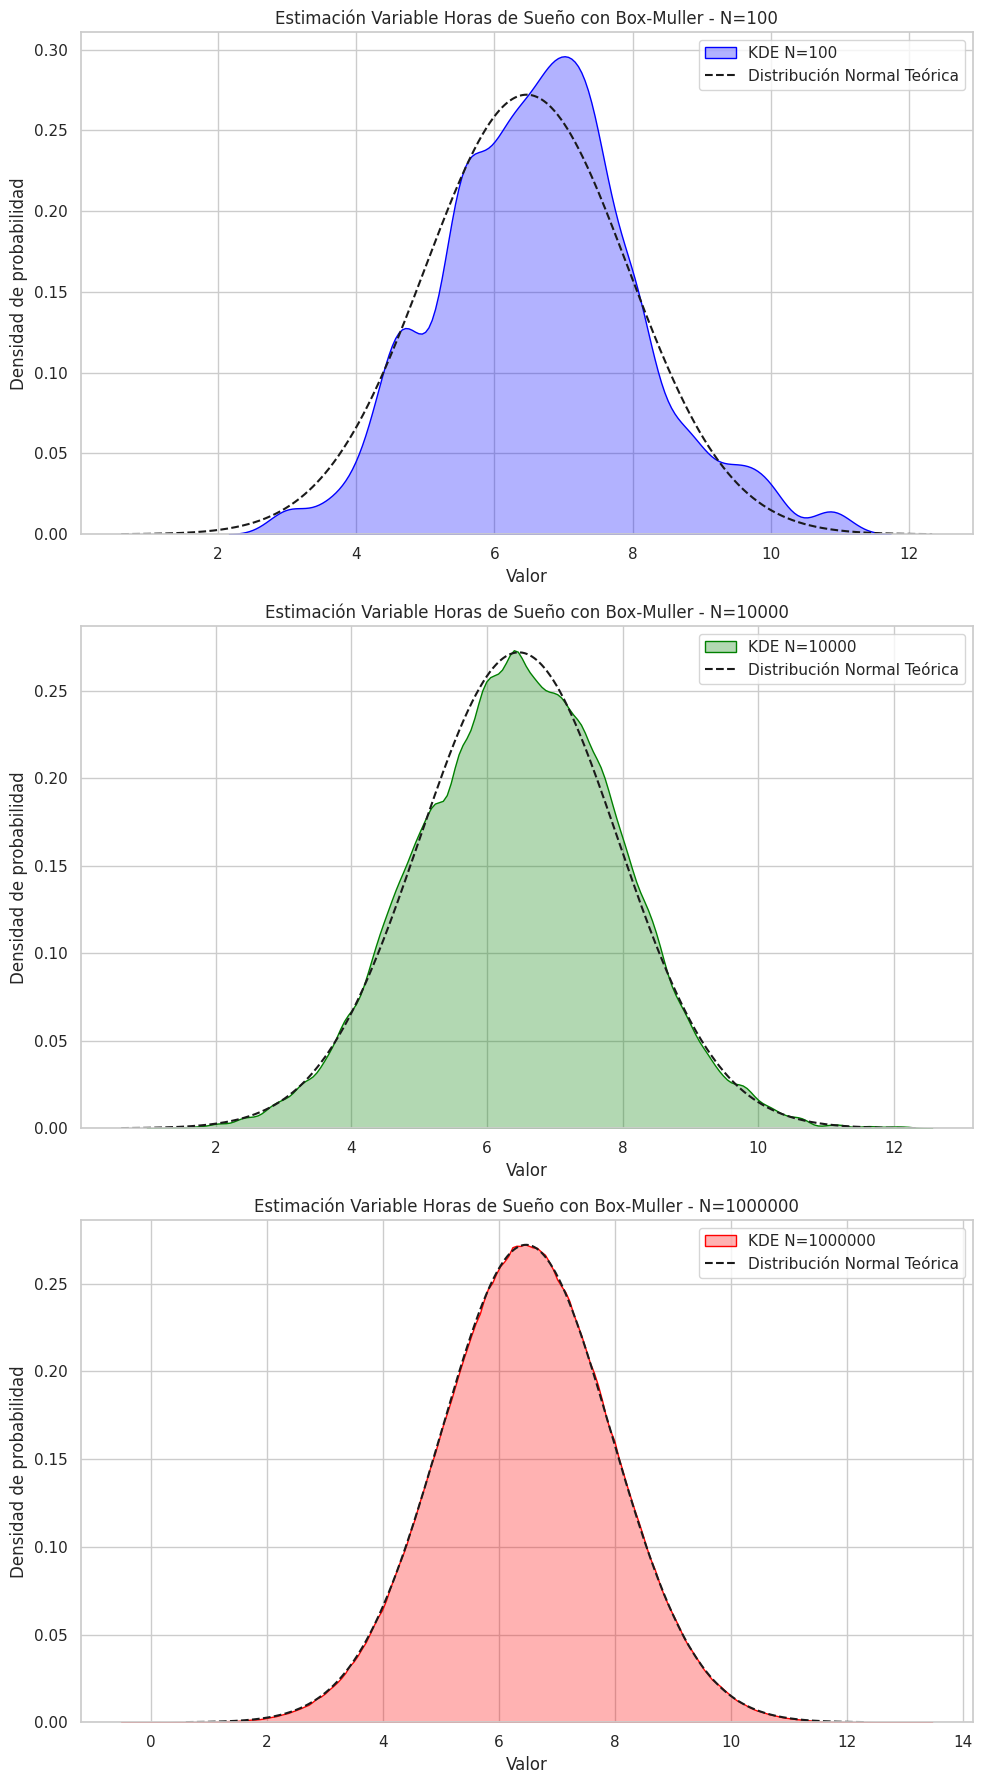

In [ ]:
def box_muller(n): # n la cantidad de simulaciones (N)
    u1 = np.random.rand(n//2) # tomo la mitad
    u2 = np.random.rand(n//2) # tomo la otra mitad
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2) # se convierten los numeros uniformes u1 y u2
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2) # en numeros "normales" z1 y z2
    z = np.concatenate([z1, z2]) # se une z1 y z2
    return z

Ns = [10**2, 10**4, 10**6] # la cantidad de simulaciones que se piden
colors = ['blue', 'green', 'red']

sns.set(style="whitegrid") # estilo del grafico
x = np.linspace(mu1 - 4*sigma1, mu1 + 4*sigma1, 1000) # rango de valores
pdf = norm.pdf(x, mu1, sigma1) # FDP teórica normal

fig, axes = plt.subplots(3, 1, figsize=(10, 18)) # se crean los 3 gráficos en una columna (uno para cada N)

for ax, N, color in zip(axes, Ns, colors):
    transformacion1 = box_muller(N) * sigma1 + mu1 # se ajusta la muestra a una distribucion normal con mu1 y sigma1
    sns.kdeplot(transformacion1, bw_adjust=0.5, color=color, fill=True, alpha=0.3, ax=ax, label=f'KDE N={N}') # se estima la densidad de cada muestra
    ax.plot(x, pdf, 'k--', label='Distribución Normal Teórica') # fdp teórica
    ax.set_title(f'Estimación Variable Horas de Sueño con Box-Muller - N={N}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend()

plt.tight_layout()
plt.show()

## Conclusión de los gráficos de la transformación inversa mediante el método de Box-Muller:

En los gráficos generados, se puede observar que a medida que aumenta la cantidad de simulaciones, la curva de densidad KDE se acerca más a la normal teórica. Cuando se hacen las 100 muestras, la forma de la simulación no se ajusta totalmente a lo teórico, ya que es más irregular y variable debido a la cantidad de muestras, que en este caso, es la menor del estudio. Cuando se realizan las 10000 muestras, se puede ver que la curva KDE se ajusta bastante más al valor esperado y con variaciones menores, y que cuando se hacen 1000000 de muestras, la curva generada coincide mayoritariamente con la esperada o teórica, coincidiendo en la dispersión de los datos y en la forma de campana que toma en el centro.

Este comportamiento, es el comportamiento ideal esperado y se respalda por la Ley de los Grandes Números, la cuál indica que si el tamaño de la muestra se incrementa, los resultados simulados tienden a acercar su comportamiento a los esperado por la teoría, lo que en este caso, como ya se mencionó, se refleja en la gran aproximación de los datos a la distribución normal teórica cuando N es igual a 1000000, que es la mayor muestra.

# Caso de la variable "Screen Time per Day (Hours)"

La distribución Beta es una distribución continua definida en el intervalo $(0, 1)$, parametrizada por dos parámetros de forma $α$ y $β$. Su función de distribución acumulada no tiene una forma cerrada sencilla, pero su inversa (denotada como **ppf** en librerías como SciPy) se puede computar numéricamente.

Para aplicar el método de la transformación inversa a la Beta, primero normalizamos los datos al intervalo $[0, 1]$ usando: $$X_{scaled} = \frac{x - min(x)}{max(x) - min(x)} $$

Esto permite ajustarlos a distribuciones que tienen soporte en $[0, 1]$.

Luego, estimamos los parámetros de la beta:

- $α$, $β$: parámetos de forma de la distribución beta.
- $loc$: ubicación inicial del soporte (por defecto 0)
- $scale$: escala del soporte (por defecto 1)

La fórmula general de la distribución beta con estos parámetros es:

$$
f(x) = \frac{(x - \text{loc})^{a - 1} \left(1 - \frac{x - \text{loc}}{\text{scale}}\right)^{b - 1}}{\text{scale} \cdot B(a, b)}
\quad
$$



La idea clave es que si $ U \sim \mathcal{U}(0,1) $ es una variable aleatoria uniforme y $F(x)$ es la función de distribución acumulada (CDF) de una variable aleatoria $X$, entonces $ X = F^{-1}(U) $ tiene la distribución deseada.

Matemáticamente, dado:

- $ U \sim \mathcal{U}(0,1) $
- $ F(x) = \mathrm{CDF}_{\mathrm{Beta}}(x; α, β, \mathrm{loc}, \mathrm{scale}) $

Entonces, $$ X = F^{-1}(U) \sim Beta(α, β, loc, scale)$$

Esto funciona, ya que por construcción, si $ U \sim \mathcal{U}(0,1) $, entonces $F^{-1}(U)$ tiene la propiedad de que **su distribución acumulada es exactamente** $F$. Así, al aplicar esta transformación a muchos valores de $U$, obtenemos una muestra que sigue la distribución beta ajustada.



## Aplicación del método:


Primero, haremos las estimaciones de los parámetros:

In [ ]:
min_val = screen_data.min() # Se escalan los datos al rango (0, 1)
max_val = screen_data.max() # que corresponden a los aceptados por esta distribucion
scaled_data = (screen_data - min_val) / (max_val - min_val)

a, b, loc, scale = stats.beta.fit(scaled_data) # Ajustar la distribución beta

print(f"Parámetro a (alfa): {a:.2f}")
print(f"Parámetro b (beta): {b:.2f}")
print(f"Loc: {loc:.2f}")
print(f"Scale: {scale:.2f}")

Parámetro a (alfa): 1.31
Parámetro b (beta): 0.95
Loc: -0.09
Scale: 1.09


Obteniendo la siguiente función:

$f(x; \alpha, \beta) = \frac{\Gamma(1.25 + 0.93)}{\Gamma(1.25)\, \Gamma(0.93)} \, x^{1.25 - 1} \, (1 - x)^{0.93 - 1}$

Luego, se aplica el método de la siguiente manera:

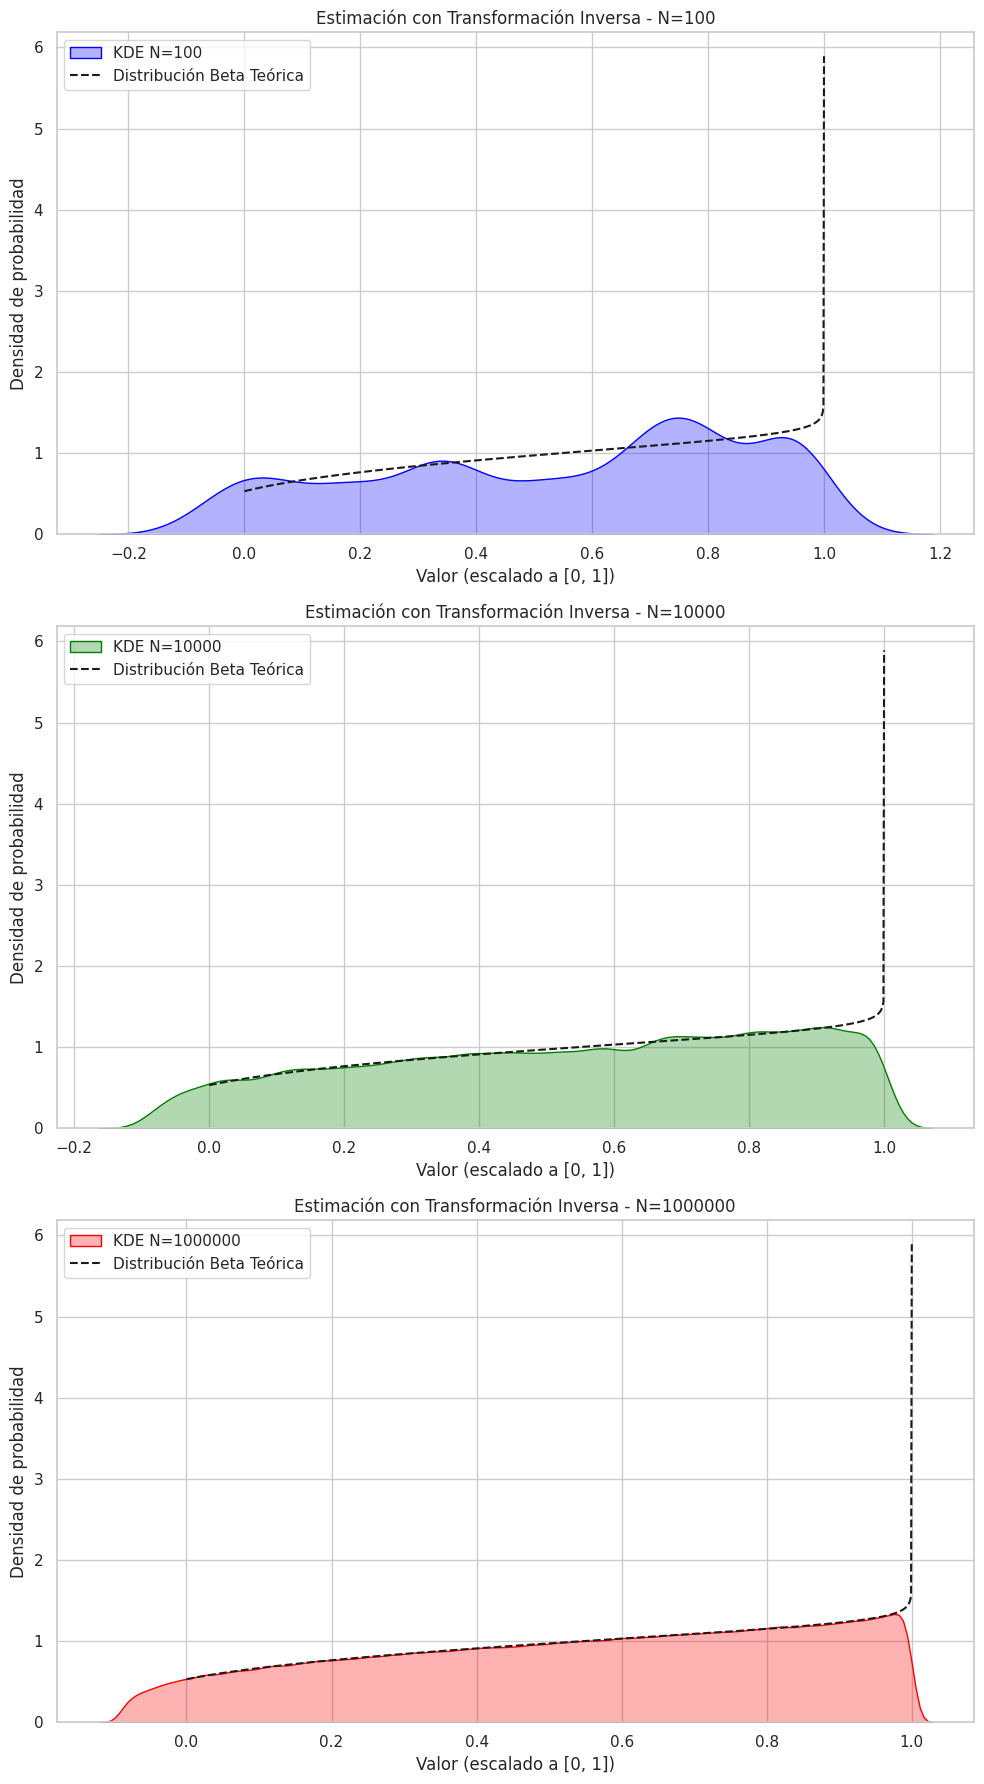

In [ ]:
x = np.linspace(0, 1, 1000) # rango de valores
pdf = beta.pdf(x, a, b, loc=loc, scale=scale) # FDP teórica de la beta

Ns = [10**2, 10**4, 10**6] # los N de las simulaciones
colors = ['blue', 'green', 'red']

sns.set(style="whitegrid") # estilo del grafico
fig, axes = plt.subplots(3, 1, figsize=(10, 18)) # se crean los 3 sub-graficos en una columna

for ax, N, color in zip(axes, Ns, colors):
    u = np.random.uniform(0, 1, N) # mtodo de la transformacion inversa
    transformacion2 = beta.ppf(u, a, b, loc=loc, scale=scale)

    sns.kdeplot(transformacion2, bw_adjust=0.5, color=color, fill=True, alpha=0.3, ax=ax, label=f'KDE N={N}') # se estima la densidad de cada muestra
    ax.plot(x, pdf, 'k--', label='Distribución Beta Teórica') # cruva teorica de la distribucion
    ax.set_title(f'Estimación con Transformación Inversa - N={N}')
    ax.set_xlabel('Valor (escalado a [0, 1])')
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend()

plt.tight_layout()
plt.show()

## Conclusión de los gráficos de la transformación inversa:

En los gráficos presentados, se observa cómo varía la aproximación de la estimación KDE a la distribución Beta teórica a medida que se incrementa el número de simulaciones. Para $N = 10^2$, la curva **KDE** (en azul) muestra una forma más irregular, con desviaciones notorias respecto a la distribución teórica, especialmente en los extremos, lo cual es esperable dada la baja cantidad de datos y la alta variabilidad estadística que implica.

Cuando se incrementa la muestra a $N = 10^4$, la estimación (en verde) comienza a asemejarse mucho más a la forma esperada de la distribución Beta, ajustándose mejor en el cuerpo central y disminuyendo las variaciones erráticas. Aun así, persisten pequeñas diferencias en la cola derecha, donde la densidad teórica tiene una pendiente más pronunciada.

Finalmente, con $ N = 10^6$, la curva **KDE** (en rojo) prácticamente calca la distribución Beta teórica en casi todo su rango, capturando con gran precisión la concentración de datos en los valores bajos hasta justo antes del ascenso abrupto en el extremo superior cercano a 1. Al igual que en la conclusión de la variable anterior, este grado de fidelidad es una evidencia clara del efecto de la Ley de los Grandes Números, pues los resultados empíricos tienden a converger hacia los valores teóricos.

---

# Estimación de Parámetros con el Método de Momentos (MoM)

## Método de Momentos (MoM) para la Distribución Normal

### 1. Variable: Horas de Sueño (Sleep Hours) | Distribución: Normal

Sabemos que nuestra variable aleatoria "Sleep Hours" $X$ sigue una distribución normal con media $\mu$ y varianza $\sigma^2$:

- Primer momento poblacional (esperanza):
  $$
  E(X) = \mu
  $$

- Segundo momento poblacional (varianza):
  $$
  E(X^2) = \mu^2 + \sigma^2
  $$

La estimación para estos parámetros se realiza utilizando los momentos muestrales de la variable. El **primer momento muestral** es la media de la muestra $\hat{\mu}$, y el **segundo momento muestral** es el promedio de los cuadrados de los datos:

- Primer momento muestral:
  $$
  \hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} X_i
  $$

- Segundo momento muestral:
  $$
  \hat{\mu^2} = \frac{1}{n} \sum_{i=1}^{n} X_i^2
  $$

Al igualar los momentos muestrales con los momentos poblacionales:

- Para $\mu$:
  $$
  \hat{\mu} = \mu
  $$

- Para $\sigma^2$:
  $$
  \hat{\sigma^2} = \hat{\mu^2} - \hat{\mu}^2
  $$

## Método de Momentos (MoM) para la Distribución Beta

### 2. Variable: Tiempo de Pantalla por Día (Screen Time per Day (Hours)) | Distribución: Beta

Sabemos que nuestra variable aleatoria "Screen Time per Day (Hours)" $X$ sigue una distribución Beta con parámetros $\alpha$ y $\beta$. La **función de densidad de probabilidad (FDP)** de la distribución Beta está dada por:

$$
f(x; \alpha, \beta) = \frac{x^{\alpha - 1}(1 - x)^{\beta - 1}}{B(\alpha, \beta)}
$$

Donde $B(\alpha, \beta)$ es la **función Beta**. El primer y segundo momento poblacional de una distribución Beta son:

- Primer momento poblacional (esperanza):
  $$
  E(X) = \frac{\alpha}{\alpha + \beta}
  $$

- Segundo momento poblacional:
  $$
  E(X^2) = \frac{\alpha(\alpha + 1)}{(\alpha + \beta)(\alpha + \beta + 1)}
  $$

Para estimar estos parámetros, primero calculamos los **momentos muestrales** de la variable "Screen Time per Day (Hours)":

- Primer momento muestral:
  $$
  \hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} X_i
  $$

- Segundo momento muestral:
  $$
  \hat{\mu^2} = \frac{1}{n} \sum_{i=1}^{n} X_i^2
  $$

La estimación de los parámetros $\alpha$ y $\beta$ se realiza utilizando los momentos muestrales de la siguiente manera:

1. Para $\alpha$:
   $$
   \hat{\alpha} = \frac{\hat{\mu} (1 - \hat{\mu})}{\hat{\mu^2} - \hat{\mu}^2}
   $$

2. Para $\beta$:
   $$
   \hat{\beta} = \hat{\alpha} \left( \frac{1 - \hat{\mu}}{\hat{\mu}} \right)
   $$

In [ ]:
# Normalización de los datos al rango [0, 1]
data_beta = df["Screen Time per Day (Hours)"].dropna()
data_beta_scaled = (data_beta - data_beta.min()) / (data_beta.max() - data_beta.min())

def metodo_momentos_normal(data):
    mu_hat = np.mean(data)
    sigma_hat = np.var(data)
    return mu_hat, sigma_hat

def metodo_momentos_beta(data):
    mu_hat = np.mean(data)
    var_hat = np.var(data, ddof=0)
    common = mu_hat * (1 - mu_hat) / var_hat - 1
    alpha_hat = mu_hat * common
    beta_hat = (1 - mu_hat) * common
    return alpha_hat, beta_hat

data_normal = df["Sleep Hours"].dropna()
data_beta = df["Screen Time per Day (Hours)"].dropna()

mu_hat, sigma_hat = metodo_momentos_normal(data_normal)
print(f"Estimación por MM para Normal: (mu) = {mu_hat}, (sigma^2) = {sigma_hat}")

alpha_hat, beta_hat = metodo_momentos_beta(data_beta_scaled)
print(f"Estimación por MM para Beta: (alpha) = {alpha_hat}, (beta) = {beta_hat}")

Estimación por MM para Normal: (mu) = 6.467070622649395, (sigma^2) = 2.149638598021235
Estimación por MM para Beta: (alpha) = 1.0248783119837914, (beta) = 0.964307748828266


# Estimación de Parámetros con el Método de Máxima Verosimilitud (MLE)

## Método de Máxima Verosimilitud (MLE) para la Distribución Normal

#### **Paso 1: Definimos la función de densidad de probabilidad (fdp)**

Sabemos que nuestra variable aleatoria "Sleep Hours" $X$ sigue una distribución normal con media $\mu$ y varianza $\sigma^2$:

$$
X \sim \mathcal{N}(\mu, \sigma^2)
$$

La función de densidad de probabilidad (fdp) para una observación $x_i$ es:

$$
f(x_i \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right)
$$

La función de verosimilitud para una muestra de $n$ datos independientes e idénticamente distribuidos (i.i.d.) es:

$$
\mathcal{L}(\mu, \sigma^2) = \prod_{i=1}^{n} f(x_i \mid \mu, \sigma) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right)
$$

#### **Paso 2: Aplicamos el logaritmo (función de log-verosimilitud)**

Aplicamos el logaritmo natural a la función de verosimilitud para facilitar el análisis:

$$
\ell(\mu, \sigma^2) = \log \mathcal{L}(\mu, \sigma^2) = - \frac{n}{2} \log(2\pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n}(x_i - \mu)^2
$$

Esta es la **función de log-verosimilitud**, que será maximizada para encontrar los estimadores de $\mu$ y $\sigma^2$.

#### **Paso 3: Derivamos la log-verosimilitud**

Para obtener los valores que maximizan $\ell(\mu, \sigma^2)$, derivamos parcialmente respecto a cada parámetro e igualamos a cero.

**Derivada respecto a $\mu$:**

$$
\frac{\partial \ell}{\partial \mu} = \frac{1}{\sigma^2} \sum_{i=1}^{n}(x_i - \mu) = 0
$$

Resolviendo, obtenemos el estimador para $\mu$:

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

**Derivada respecto a $\sigma^2$:**

$$
\frac{\partial \ell}{\partial \sigma^2} = - \frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^{n}(x_i - \mu)^2 = 0
$$

Resolviendo, obtenemos el estimador para $\sigma^2$:

$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n}(x_i - \hat{\mu})^2
$$

---

Por lo tanto, Los estimadores de máxima verosimilitud para la distribución normal son:

$$
\hat{\mu}_{MLE} = \bar{x}, \qquad \hat{\sigma}^2_{MLE} = \frac{1}{n} \sum_{i=1}^{n}(x_i - \bar{x})^2
$$

y como nuestras variables seleccionadas siguen esta distribución y tanto $\mu$ como $\sigma^2$ de cada varialbe son conocidas, podemos asegurar:

In [ ]:
def estimadores_mle(data):
    mu_mle = np.mean(data)
    sigma2_mle = np.var(data, ddof=0)
    return mu_mle, sigma2_mle

mu_sueno, sigma2_sueno = estimadores_mle(sleep_data)

print("\nParámetros MLE para Horas de Sueño:")
print(f" {mu_sueno:.4f} (μ̂)")
print(f" {sigma2_sueno:.4f} (σ̂²)")



Parámetros MLE para Horas de Sueño:
 6.4671 (μ̂)
 2.1496 (σ̂²)


## Estimación de Parámetros con el Método de Máxima Verosimilitud (MLE) para la Distribución Beta

#### **Paso 1: Definimos la función de densidad de probabilidad (fdp)**

Asumimos que la variable aleatoria $X$ sigue una distribución Beta con parámetros $\alpha$ y $\beta$:

$$
X \sim \text{Beta}(\alpha, \beta)
$$

La función de densidad de probabilidad (fdp) para una observación $x_i \in (0,1)$ es:

$$
f(x_i \mid \alpha, \beta) = \frac{1}{B(\alpha, \beta)} x_i^{\alpha - 1} (1 - x_i)^{\beta - 1}
$$

donde $B(\alpha, \beta)$ es la función Beta, que se define en términos de la función Gamma como:

$$
B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}
$$

Entonces, la fdp queda:

$$
f(x_i \mid \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} x_i^{\alpha - 1} (1 - x_i)^{\beta - 1}
$$

#### **Paso 2: Función de log-verosimilitud**

Dada una muestra de $n$ datos i.i.d. $x_1, x_2, ..., x_n$, la función de log-verosimilitud es:

$$
\ell(\alpha, \beta) = \sum_{i=1}^{n} \log f(x_i \mid \alpha, \beta)
= n \log \Gamma(\alpha + \beta) - n \log \Gamma(\alpha) - n \log \Gamma(\beta)
+ (\alpha - 1) \sum_{i=1}^{n} \log x_i + (\beta - 1) \sum_{i=1}^{n} \log(1 - x_i)
$$

Esta expresión será maximizada para obtener los estimadores de $\alpha$ y $\beta$.

#### **Paso 3: Derivación — sistema de ecuaciones para MLE**
para maximizar la log-verosimilitud, derivamos parcialmente respecto a cada parámetro e igualamos a cero.

**Derivada parcial respecto a $\alpha$:**

$$
\frac{\partial \ell}{\partial \alpha} =
n \psi(\alpha + \beta) - n \psi(\alpha) + \sum_{i=1}^{n} \log x_i = 0
$$

**Derivada parcial respecto a $\beta$:**

$$
\frac{\partial \ell}{\partial \beta} =
n \psi(\alpha + \beta) - n \psi(\beta) + \sum_{i=1}^{n} \log(1 - x_i) = 0
$$

Donde $\psi(\cdot)$ es la **función digamma**, derivada logarítmica de la función Gamma.

Esto nos entrega un **sistema de ecuaciones no lineales** en $\alpha$ y $\beta$, que **NO** tiene solución analítica y generalmente se resuelve numéricamente (por ejemplo, con métodos de optimización como **Newton-Raphson**).

---

El código a continuación busca estimar los parámetros α y β de una distribución Beta, a partir de una muestra de datos (en este caso, `screen_data`), usando el método de máxima verosimilitud (MLE). Como no se puede despejar directamente una solución cerrada para α y β, se utiliza optimización numérica.

In [ ]:
# Normalización al rango [0, 1]
screen_data = (screen_data - screen_data.min()) / (screen_data.max() - screen_data.min())

# Evita valores exactamente 0 o 1
epsilon = 1e-6
screen_data = np.clip(screen_data, epsilon, 1 - epsilon)

# Función de log-verosimilitud negativa para la Beta
def neg_log_likelihood(params, data):
    alpha, beta = params
    if alpha <= 0 or beta <= 0:
        return np.inf
    n = len(data)
    log_likelihood = (
        n * gammaln(alpha + beta)
        - n * gammaln(alpha)
        - n * gammaln(beta)
        + (alpha - 1) * np.sum(np.log(data))
        + (beta - 1) * np.sum(np.log(1 - data))
    )
    return -log_likelihood

# Usa los valores MoM como punto inicial
initial_guess = [max(alpha_hat, 1e-3), max(beta_hat, 1e-3)]

result = minimize(
    neg_log_likelihood,
    initial_guess,
    args=(screen_data,),
    bounds=[(1e-5, None), (1e-5, None)]
)

if result.success:
    alpha_mle, beta_mle = result.x
    print(f"Estimación MLE para Beta (screen_data):")
    print(f"  α̂ = {alpha_mle:.4f}")
    print(f"  β̂ = {beta_mle:.4f}")
    print(f"  (Inicialización MoM: α={alpha_hat:.4f}, β={beta_hat:.4f})")
else:
    print("Optimización fallida:", result.message)

Estimación MLE para Beta (screen_data):
  α̂ = 0.8718
  β̂ = 0.8142
  (Inicialización MoM: α=1.0249, β=0.9643)


Primero, los datos se normalizan al rango [0, 1] y se ajustan para evitar valores extremos (0 o 1) que puedan causar problemas numéricos. Luego, se define la función de log-verosimilitud negativa de la Beta y se utiliza el optimizador `minimize` de SciPy, partiendo desde los valores obtenidos por el método de los momentos (MoM) como punto inicial.  

El objetivo es encontrar los valores de α y β que maximizan la verosimilitud de los datos observados bajo el modelo Beta, obteniendo así los estimadores MLE más adecuados para describir la distribución de la variable "Screen Time per Day (Hours)" normalizada.

---

# Gráficos comparativos

## Gráfico comparativo para los estimadores de la variable "Horas de Sueño"

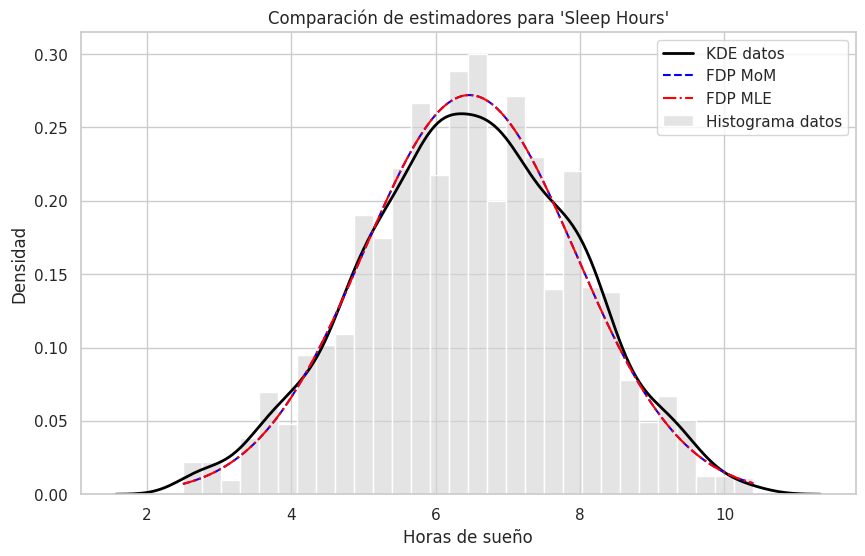

In [ ]:
x = np.linspace(sleep_data.min(), sleep_data.max(), 1000)

plt.figure(figsize=(10, 6))

# Histograma y KDE de los datos
sns.histplot(sleep_data, bins=30, stat="density", color="lightgray", label="Histograma datos", alpha=0.6)
sns.kdeplot(sleep_data, color="black", label="KDE datos", linewidth=2)

# FDP con parámetros MoM
plt.plot(x, norm.pdf(x, mu_hat, np.sqrt(sigma_hat)), color="blue", linestyle="--", label="FDP MoM")

# FDP con parámetros MLE
plt.plot(x, norm.pdf(x, mu_sueno, np.sqrt(sigma2_sueno)), color="red", linestyle="-.", label="FDP MLE")

plt.title("Comparación de estimadores para 'Sleep Hours'")
plt.xlabel("Horas de sueño")
plt.ylabel("Densidad")
plt.legend()
plt.show()

Analisis grafico:  se observa una alta concordancia entre las tres curvas presentadas: la función de densidad correpondiente a los datos, la estimación obtenida mediante el Método de los Momentos (rojo punteado) y la de Máxima Verosimilitud (azul punteado). Esta coincidencia visual valida de manera contundente que la distribución Normal fue una elección adecuada para modelar esta variable.

Tanto la curva roja como la azul se alinean casi al 100% con la forma de campana de la curva negra, solo con ligeras irregularidades.

  Esto evidencia que el comportamiento de los datos en esta variable es suficientemente regular y simétrico como para que ambos enfoques estadísticos —a pesar de sus diferencias metodológicas— coincidan en su representación teórica. En este contexto, el Método de los Momentos y la Máxima Verosimilitud resultan adecuados.

## Gráfico comparativo para los estimadores de la variable "Horas de Pantalla al Día"

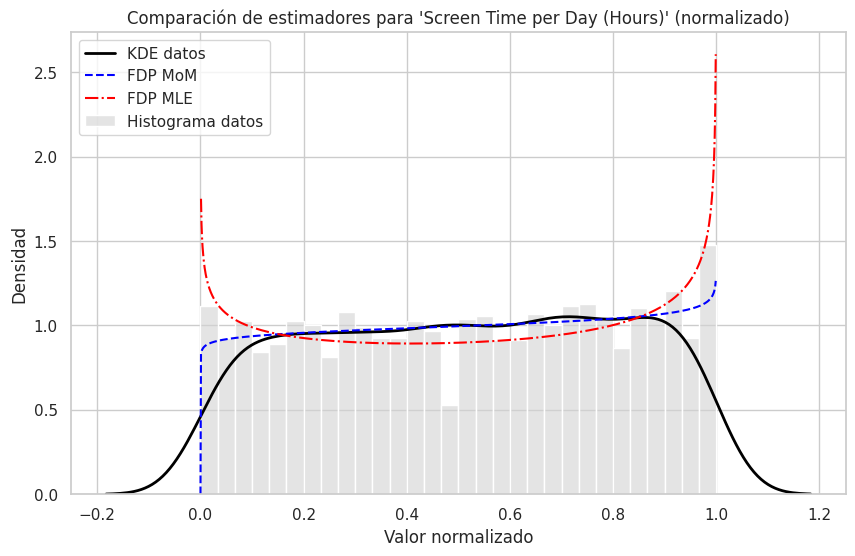

In [ ]:
x = np.linspace(0, 1, 1000)

plt.figure(figsize=(10, 6))

# Histograma y KDE de los datos normalizados
sns.histplot(screen_data, bins=30, stat="density", color="lightgray", label="Histograma datos", alpha=0.6)
sns.kdeplot(screen_data, color="black", label="KDE datos", linewidth=2)

# FDP con parámetros MoM
plt.plot(x, beta.pdf(x, alpha_hat, beta_hat), color="blue", linestyle="--", label="FDP MoM")

# FDP con parámetros MLE
plt.plot(x, beta.pdf(x, alpha_mle, beta_mle), color="red", linestyle="-.", label="FDP MLE")

plt.title("Comparación de estimadores para 'Screen Time per Day (Hours)' (normalizado)")
plt.xlabel("Valor normalizado")
plt.ylabel("Densidad")
plt.legend()
plt.show()

En contraste con el gráfico de la variable anterior, el gráfico de la variable Screen Time per Day (Hours) muestra diferencias más notorias entre los métodos de estimación. Aunque ambas curvas estimadas siguen razonablemente el comportamiento de los datos (curva negra), es clara que la similitud del ajuste entregado por la Máxima Verosimilitud (azul punteada) es superior, aunque sigue sin asemejarse tanto como las curvas resultantes del gráfico anterior. Esta curva logra capturar de manera más precisa tanto la asimetría como las colas de la distribución real, adaptándose mejor al patrón observado en los datos simulados.

El Método de los Momentos (rojo punteado), en cambio, presenta pequeñas desviaciones, especialmente en los extremos, lo cual es comprensible dado que su enfoque depende directamente de los momentos muestrales, que pueden no capturar con fidelidad ciertas características estructurales de distribuciones como la Beta. Esto pone de relieve una limitación importante del MM cuando se trabaja con distribuciones más complejas o poco comunes.

Así, este segundo gráfico resalta cómo, en situaciones donde la variable no sigue una forma simétrica estándar, la Máxima Verosimilitud ofrece un ajuste más sólido.

• ¿Qué suposiciones haces al usar cada método de estimación?

El Método de los Momentos asume que la distribución teórica elegida tiene momentos definidos (medias, varianzas, etc.) y que estos pueden aproximarse adecuadamente mediante los momentos muestrales.
En el Método de Máxima Verosimilitud, se asume que los datos provienen de una distribución específica, y que los parámetros que maximizan la verosimilitud conjunta de la muestra reflejan los valores más probables del modelo real (esto se puede ver representado en los resultados obtenidos mediante este método con nuestras 2 variables). Este método también presupone independencia entre las observaciones y continuidad o derivabilidad de la función de verosimilitud.

• ¿Cuáles son las limitaciones de los métodos de máxima verosimilitud y de los momentos en la práctica?

El Método de los Momentos puede entregar estimaciones poco precisas cuando los primeros momentos no capturan adecuadamente la forma de la distribución (esto fue visible en la segunda variable estudiada), lo cual ocurre especialmente en distribuciones con asimetrías fuertes o colas pesadas.
El Método de Máxima Verosimilitud, aunque más preciso, puede ser computacionalmente costoso o difícil de aplicar cuando la función de verosimilitud es complicada o no tiene derivadas simples. También puede ser sensible a outliers o a malos supuestos del modelo base (por ejemplo, asumir normalidad cuando los datos no lo son).

• ¿Cómo podrías aplicar el modelo ajustado para hacer predicciones o inferencias sobre una nueva muestra de datos?

Una vez ajustado el modelo y estimados los parámetros, se puede usar la distribución obtenida para:

Predecir intervalos de probabilidad de ocurrencia de ciertos valores.

Simular nuevas observaciones que sigan el mismo patrón estadístico.

Calcular probabilidades o tendencias asociadas a eventos futuros o condiciones específicas.

• ¿Qué implicaciones tienen los parámetros estimados en el contexto del problema real que modela el dataset?

Los parámetros estimados permiten cuantificar el comportamiento promedio y la dispersión de variables clave como horas de sueño o tiempo frente a pantallas. En contextos de salud mental, por ejemplo, conocer la media y la varianza de estas variables puede ayudar a identificar patrones de riesgo, para así dar soluciones a ciertas problematicas derivadas de estos datos.

• ¿De qué forma se puede validar los resultados que no sea de forma gráfica?

Una forma de validación alternativa es evaluar las propiedades teóricas del estimador, como su consistencia, insesgamiento y eficiencia. Por ejemplo, se puede comprobar si la esperanza del estimador coincide con el parámetro real o si su varianza es baja y cumple con la cota de Cramér-Rao.

Además, en el caso del Método de Máxima Verosimilitud, se puede comparar el valor de la verosimilitud entre distintos modelos, sin necesidad de gráficos. Como complemento, criterios como el AIC (usado en la entrega) permiten validar qué modelo ajusta mejor penalizando la complejidad.

---
---

# Entrega 3

## 2.1. Calculo del Intervalo de Confianza (IC)

### Variable: *Sleep Hours* (Distribución Normal)

#### Supuestos

* La variable *Sleep Hours* se modela bajo una distribución normal:

$$
X \sim \mathcal{N}(\mu, \sigma^2)
$$

* Los estimadores obtenidos mediante el Método de los Momentos (MM) y Máxima Verosimilitud (MLE) coinciden, entregando los siguientes valores:

$$
\hat{\mu}_{MM} = \hat{\mu}_{MLE} = 6.4671, \qquad \hat{\sigma}^2_{MM} = \hat{\sigma}^2_{MLE} = 2.1496
$$

* El tamaño muestral utilizado es $n$, el cual se obtiene directamente desde el conjunto de datos.

* Se utiliza un nivel de confianza del 97.8%, lo que implica un valor de significancia de:

$$
\alpha = 1 - 0.978 = 0.022
$$

#### Cálculo del Intervalo de Confianza

Dado que se considera la varianza poblacional como conocida (aunque se aproxima con la varianza muestral), el intervalo de confianza para la media se construye utilizando la distribución normal estándar. La expresión es la siguiente:

$$
IC = \left[ \bar{x} - z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}},\ \bar{x} + z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} \right]
$$

Donde:

* $\bar{x} = 6.4671$
* $\sigma = \sqrt{2.1496} \approx 1.4662$
* $z_{\alpha/2} \approx 2.2632$, correspondiente al valor crítico de la distribución normal estándar para un nivel de confianza del 97.8% (es decir, $1 - \alpha/2 = 0.989$)

Este intervalo permite estimar el rango en el cual se encuentra el valor verdadero de la media poblacional con un 97.8% de confianza, bajo los supuestos descritos.

In [ ]:
sigma = np.sqrt(sigma_hat)

# Los datos originales están en una variable Sleep_Hours
n = len(sleep_data)  # tamaño de muestra
print("Con n = ", n)
confianza = 0.978
alpha = 1 - confianza
z = norm.ppf(1 - alpha/2)

margen_error = z * sigma / np.sqrt(n)
ic_normal = (mu_hat - margen_error, mu_hat + margen_error)

print("Intervalo de confianza al 97.8% para Sleep Hours:", ic_normal)


Con n =  2393
Intervalo de confianza al 97.8% para Sleep Hours: (np.float64(6.3984244037966675), np.float64(6.535716841502122))


---

### Variable: *Screen Time per Day (Hours)* (Distribución Beta)

#### Supuestos

* La variable *Screen Time per Day (Hours)* se modela mediante una distribución Beta:

$$
X \sim \text{Beta}(\alpha, \beta)
$$

* Para esta variable, los estimadores obtenidos mediante el Método de los Momentos (MM) y la Máxima Verosimilitud (MLE) **no coincidieron**. Dado que los valores de MLE fueron obtenidos como aproximaciones iniciales y no como solución final de la optimización (debido a la complejidad del sistema no lineal involucrado), se opta por utilizar los valores estimados mediante el Método de los Momentos:

$$
\hat{\alpha}_{MM} = 1.0249, \qquad \hat{\beta}_{MM} = 0.9643
$$

* A partir de estos parámetros, se estiman la media y varianza poblacionales de la distribución:

$$
\mu = \mathbb{E}[X] = \frac{\alpha}{\alpha + \beta} = \frac{1.0249}{1.0249 + 0.9643} \approx 0.5154
$$

$$
\sigma^2 = \text{Var}(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}
\approx \frac{1.0249 \cdot 0.9643}{(1.9892)^2 \cdot 2.9892} \approx 0.0826
$$

Por lo tanto, la desviación estándar estimada es:

$$
\sigma \approx \sqrt{0.0826} \approx 0.2874
$$

* El tamaño muestral utilizado es $n$, obtenido desde el conjunto de datos correspondiente.

* Se utiliza un nivel de confianza del 97.8%, lo que implica:

$$
\alpha = 1 - 0.978 = 0.022
$$

#### Cálculo del Intervalo de Confianza

Se aplica la misma estructura de intervalo de confianza que para la variable anterior, bajo la suposición de normalidad de la media muestral (justificada por el Teorema Central del Límite). El intervalo de confianza se expresa como:

$$
IC = \left[ \mu - z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}},\ \mu + z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} \right]
$$

Donde:

* $\mu \approx 0.5154$
* $\sigma \approx 0.2874$
* $z_{\alpha/2} \approx 2.2632$, correspondiente al nivel de confianza del 97.8% (es decir, $1 - \alpha/2 = 0.989$)

Este intervalo proporciona una estimación confiable para la media de la variable *Screen Time per Day (Hours)*, considerando la información disponible y los supuestos asumidos.

In [ ]:
mu_beta = alpha_hat / (alpha_hat + beta_hat)
var_beta = (alpha_hat * beta_hat) / (((alpha_hat + beta_hat)**2) * (alpha_hat + beta_hat + 1))
sigma_beta = np.sqrt(var_beta)

n_beta = len(screen_data)  # Es la variable con los datos reales
print("Con n = ", n_beta)
z = norm.ppf(1 - alpha/2)

margen_error_beta = z * sigma_beta / np.sqrt(n_beta)
ic_beta = (mu_beta - margen_error_beta, mu_beta + margen_error_beta)

print("Intervalo de confianza al 97.8% para Screen Time:", ic_beta)

Con n =  2393
Intervalo de confianza al 97.8% para Screen Time: (np.float64(0.5016909672730872), np.float64(0.5287589561145714))


---

## Nivel de incertidumbre actual del IC y cantidad de datos necesarios para reducirlo en un 76%

### Contexto

En esta sección, se analizará el **nivel de incertidumbre actual** del intervalo de confianza (IC) calculado previamente para la media poblacional de las variables, y se determinará la cantidad de datos adicionales necesarios para **reducir dicha incertidumbre en un 76%**, manteniendo constante el nivel de confianza (97.8%).

### ¿Que es el Nivel de Incertidumbre?


El nivel de incertidumbre está dado por el **margen de error** (ME) del intervalo de confianza. Este se define como:

$$
\text{ME} = z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

Entonces, el intervalo de confianza está dado por:

$$
IC = \left[ \bar{x} - \text{ME},\ \bar{x} + \text{ME} \right]
$$

---

### Variable: *Sleep Hours*

#### Paso 1: Cálculo del margen de error actual

Sea:
* $z_{\alpha/2} \approx 2.2632$ (para un nivel de confianza del 97.8%)
* $\sigma \approx 1.4662$
* $n = 2393$: tamaño muestral efectivo

Entonces:

$$
\text{ME}_{\text{actual}} = 2.2632 \cdot \frac{1.4662}{\sqrt{2393}} \approx 0.067834
$$

**Interpretación**: Actualmente, la media estimada de *Sleep Hours* tiene un margen de error de aproximadamente **0.0678 horas**.

#### Paso 2: Margen de error objetivo (reducción del 76%)

Reducir la incertidumbre en un 76% implica que queremos que el nuevo margen de error sea:

$$
\text{ME}_{\text{nuevo}} = (1 - 0.76) \cdot \text{ME}_{\text{actual}} = 0.24 \cdot \text{ME}_{\text{actual}} \approx 0.016280
$$

#### Paso 3: Cálculo del nuevo tamaño muestral requerido

Queremos encontrar $n_{\text{nuevo}}$ tal que:

$$
\text{ME}_{\text{nuevo}} = z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n_{\text{nuevo}}}} \Rightarrow
n_{\text{nuevo}} = \left( \frac{z_{\alpha/2} \cdot \sigma}{\text{ME}_{\text{nuevo}}} \right)^2
$$

Sustituyendo:

$$
n_{\text{nuevo}} = \left( \frac{2.2632 \cdot 1.4662}{0.016280} \right)^2 \approx 41545.4592
$$

**Resultado**: Para reducir el margen de error en un 76%, se requiere un tamaño muestral de aproximadamente **41546 observaciones**.

In [ ]:
# Valores estimados
sigma = np.sqrt(2.1496)  # desviación estándar
confianza = 0.978
alpha = 1 - confianza
z = norm.ppf(1 - alpha/2)

n_actual = len(sleep_data)

# Margen de error actual
me_actual = z * sigma / np.sqrt(n_actual)

# Margen de error objetivo
proporcion = 1 - 0.76
me_nuevo = proporcion * me_actual

# Tamaño muestral necesario
n_nuevo = (z * sigma / me_nuevo) ** 2

print(f"Tamaño muestral actual: {n_actual}")
print(f"Margen de error actual: {me_actual:.4f}")
print(f"Margen de error reducido (24% del original): {me_nuevo:.4f}")
print(f"Nuevo tamaño muestral necesario: {np.ceil(n_nuevo).astype(int)}")


Tamaño muestral actual: 2393
Margen de error actual: 0.0686
Margen de error reducido (24% del original): 0.0165
Nuevo tamaño muestral necesario: 41546


#### Conclusión

Reducir la incertidumbre del intervalo de confianza en un 76% para la media de *Sleep Hours* requiere incrementar significativamente el tamaño muestral.

---

### Variable: *Screnn Time per Day (Hours)*

#### Parámetros estimados (por MM)

Recordando los valores obtenidos para la distribución Beta mediante el **método de los momentos**:

* $\hat{\alpha}_{MM} = 1.0249$
* $\hat{\beta}_{MM} = 0.9643$

La media poblacional estimada es:

$$
\mu = \mathbb{E}[X] = \frac{\alpha}{\alpha + \beta} = \frac{1.0249}{1.9892} \approx 0.5154
$$

La varianza poblacional estimada es:

$$
\sigma^2 = \text{Var}(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}
\approx \frac{1.0249 \cdot 0.9643}{(1.9892)^2 \cdot 2.9892} \approx 0.0826
$$

Y su desviación estándar:

$$
\sigma \approx \sqrt{0.0826} \approx 0.2874
$$

#### Paso 1: Cálculo del margen de error actual

Asumiendo un tamaño muestral $n = 2393$, obtenemos:

$$
\text{ME}_{\text{actual}} = 2.2632 \cdot \frac{0.2874}{\sqrt{2393}} \approx 0.013296
$$

**Interpretación**: El margen de error actual para la media de *Screen Time* es aproximadamente **0.0133 horas**.

#### Paso 2: Reducción del margen de error

Queremos reducir la incertidumbre en un 76%, es decir, dejar solo un 24% del margen de error original:

$$
\text{ME}_{\text{nuevo}} = 0.24 \cdot \text{ME}_{\text{actual}} \approx 0.00319104
$$

#### Paso 3: Tamaño muestral requerido

Para determinar el nuevo tamaño muestral necesario:

$$
n_{\text{nuevo}} = \left( \frac{z_{\alpha/2} \cdot \sigma}{\text{ME}_{\text{nuevo}}} \right)^2 =
\left( \frac{2.2632 \cdot 0.2874}{0.00319104} \right)^2 \approx 41548.45703
$$

**Resultado**: Para lograr una reducción del 76% en la incertidumbre, se necesita un tamaño muestral aproximado de **41549 observaciones**.

In [ ]:
# Cálculo de media y desviación estándar de la Beta
mu_beta = alpha_hat / (alpha_hat + beta_hat)
var_beta = (alpha_hat * beta_hat) / ((alpha_hat + beta_hat)**2 * (alpha_hat + beta_hat + 1))
sigma_beta = np.sqrt(var_beta)

# Datos reales sin NaN
n_actual_beta = len(screen_data)

# Z crítico
confianza = 0.978
alpha = 1 - confianza
z = norm.ppf(1 - alpha/2)

# Margen de error actual
me_actual_beta = z * sigma_beta / np.sqrt(n_actual_beta)

# Margen de error reducido
proporcion = 1 - 0.76
me_nuevo_beta = proporcion * me_actual_beta

# Tamaño muestral necesario
n_nuevo_beta = (z * sigma_beta / me_nuevo_beta) ** 2

print(f"Tamaño muestral actual: {n_actual_beta}")
print(f"Margen de error actual: {me_actual_beta:.4f}")
print(f"Margen de error reducido (24% del original): {me_nuevo_beta:.4f}")
print(f"Nuevo tamaño muestral necesario: {np.ceil(n_nuevo_beta).astype(int)}")


Tamaño muestral actual: 2393
Margen de error actual: 0.0135
Margen de error reducido (24% del original): 0.0032
Nuevo tamaño muestral necesario: 41546


#### Conclusión

El análisis muestra que para reducir la incertidumbre del intervalo de confianza en un 76% en la media de *Screen Time per Day (Hours)*, se requiere aumentar el tamaño de la muestra desde su valor actual a aproximadamente **41546 observaciones**.

---

## Nivel de Significancia Requerido para Reducir en un 76% la Incertidumbre, Manteniendo el Tamaño Muestral

### Fundamento Teórico

En este punto, se busca calcular qué nivel de significancia (o, equivalentemente, qué nivel de confianza) sería necesario si **se desea reducir la incertidumbre (el margen de error) en un 76%**, **manteniendo constante el tamaño muestral actual**.

Recordando que el margen de error se define como:

$$
\text{ME} = z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

Si mantenemos constante $\sigma$ y $n$, entonces para reducir el margen de error en un 76% (dejando solo un 24% del original), necesitamos encontrar el nuevo valor crítico $z'$ tal que:

$$
\text{ME}_{\text{nuevo}} = 0.24 \cdot \text{ME}_{\text{actual}} = z' \cdot \frac{\sigma}{\sqrt{n}}
$$

De esta relación se despeja $z'$:

$$
z' = \frac{0.24 \cdot \text{ME}_{\text{actual}}}{\sigma / \sqrt{n}} = 0.24 \cdot z_{\alpha/2}
$$

Luego, a partir de $z'$, se puede calcular el nuevo nivel de confianza requerido:

$$
\text{Nuevo nivel de confianza} = 2 \cdot \Phi(z') - 1
$$

Y, por tanto, el nuevo $\alpha$ necesario será:

$$
\alpha_{\text{nuevo}} = 1 - \left(2 \cdot \Phi(z') - 1\right) = 2 \cdot \left(1 - \Phi(z')\right)
$$

---

### Variable *Sleep Hours*

#### Datos conocidos

* Nivel de confianza original: $97.8\% \Rightarrow \alpha = 0.022$
* Valor crítico correspondiente: $z_{\alpha/2} \approx 2.2632$
* Se desea reducir el margen de error en un 76% (mantener solo el 24%).

#### Cálculo

El nuevo valor crítico necesario para lograr esa reducción:

$$
z' = 0.24 \cdot z_{\alpha/2} = 0.24 \cdot 2.2632 \approx 0.5432
$$

A partir de este nuevo $z'$, se obtiene el nivel de confianza correspondiente:

$$
\Phi(0.5432) \approx 0.7057
$$

$$
\text{Confianza nueva} = 2 \cdot 0.7057 - 1 = 0.4114
$$

Entonces, el nuevo nivel de significancia necesario sería:

$$
\alpha_{\text{nuevo}} = 1 - 0.4114 = 0.5886
$$

**Interpretación**: Para reducir la incertidumbre (margen de error) en un 76% sin aumentar la cantidad de datos, se debería aceptar un **nivel de confianza de apenas 41.1%**, es decir, un nivel de significancia de **58.9%**, lo cual es estadísticamente inaceptable en la mayoría de contextos científicos.


In [ ]:
# Nivel original
z_original = norm.ppf(1 - 0.022/2)

# Reducción deseada
reduccion = 0.76
proporcion = 1 - reduccion

# Nuevo z'
z_nuevo = proporcion * z_original

# Nivel de confianza nuevo
confianza_nueva = 2 * norm.cdf(z_nuevo) - 1
alpha_nueva = 1 - confianza_nueva

print(f"z original: {z_original:.4f}")
print(f"z nuevo: {z_nuevo:.4f}")
print(f"Nuevo nivel de confianza: {confianza_nueva*100:.2f}%")
print(f"Nuevo alpha necesario: {alpha_nueva:.4f}")

z original: 2.2904
z nuevo: 0.5497
Nuevo nivel de confianza: 41.75%
Nuevo alpha necesario: 0.5825


### Conclusión

Reducir la incertidumbre del intervalo de confianza en un 76% sin aumentar el tamaño de muestra implicaría aceptar un nivel de confianza extremadamente bajo, del orden de 41.1%. Esto comprometería seriamente la confiabilidad de las inferencias estadísticas, y **no es una estrategia recomendada**. En contextos científicos o de ingeniería, es más razonable aumentar el tamaño muestral antes que sacrificar confianza estadística.

---

### Variable *Sleep Hours*

#### Datos conocidos

* Nivel de confianza original: $97.8\% \Rightarrow \alpha = 0.022$
* Valor crítico correspondiente: $z_{\alpha/2} \approx 2.2632$
* Se desea reducir el margen de error (la incertidumbre) en un **76%**, sin modificar el tamaño muestral actual.

#### Cálculo del nuevo nivel de significancia

Siguiendo la fórmula ya deducida:

1. Se calcula el nuevo valor crítico $z'$:

$$
z' = 0.24 \cdot z_{\alpha/2} = 0.24 \cdot 2.2632 \approx 0.5432
$$

2. A partir de $z'$, se obtiene el nuevo nivel de confianza:

$$
\Phi(0.5432) \approx 0.7057
$$

$$
\text{Nuevo nivel de confianza} = 2 \cdot 0.7057 - 1 = 0.4114
$$

3. Por lo tanto, el nuevo $\alpha$ necesario es:

$$
\alpha_{\text{nuevo}} = 1 - 0.4114 = 0.5886
$$

**Interpretación**: Al igual que en el caso de *Sleep Hours*, para reducir el margen de error en un 76% sin aumentar el tamaño muestral, se tendría que aceptar un nivel de confianza de **41.1%**, lo cual es estadísticamente inadecuado para análisis rigurosos.

In [ ]:
# Valor z original
z_original = norm.ppf(1 - 0.022 / 2)

# Reducción deseada
reduccion = 0.76
proporcion = 1 - reduccion

# Nuevo valor crítico z'
z_nuevo = proporcion * z_original

# Nuevo nivel de confianza y alpha
confianza_nueva = 2 * norm.cdf(z_nuevo) - 1
alpha_nuevo = 1 - confianza_nueva

print(f"z original: {z_original:.4f}")
print(f"z nuevo: {z_nuevo:.4f}")
print(f"Nuevo nivel de confianza: {confianza_nueva*100:.2f}%")
print(f"Nuevo alpha necesario: {alpha_nuevo:.4f}")


z original: 2.2904
z nuevo: 0.5497
Nuevo nivel de confianza: 41.75%
Nuevo alpha necesario: 0.5825


#### Conclusión

Tanto en la variable *Screen Time per Day (Hours)* como en *Sleep Hours*, intentar reducir en un 76% el margen de error sin incrementar el tamaño muestral lleva a un compromiso drástico en el nivel de confianza: **desde 97.8% a solo 41.1%**, lo que disminuye gravemente la validez de las inferencias. Por ello, desde un punto de vista metodológico, es **preferible aumentar el tamaño muestral** que disminuir la confiabilidad del resultado estadístico.

---

## Comparación entre Métodos para Reducir la Incertidumbre

### Objetivo

Analizar y comparar las dos estrategias presentadas en los puntos anteriores para reducir la incertidumbre en la estimación de la media poblacional $\mu$ para ambas variables: *Sleep Hours* y *Screen Time per Day (Hours)*.

Las estrategias son:

1. **Aumentar el tamaño muestral** (manteniendo constante el nivel de confianza).
2. **Reducir el nivel de significancia** (manteniendo constante el tamaño muestral).

### Comparación Conceptual

#### Estrategia 1: Aumentar el tamaño muestral

* El margen de error se reduce según:

  $$
  \text{ME} = z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
  $$

* Para lograr una reducción del 76% en el margen de error, se requiere multiplicar el tamaño muestral por un factor de:

  $$
  \left( \frac{1}{0.24} \right)^2 * 2393 \approx 41558.7
  $$

* Aunque costosa en términos de recolección de datos, esta estrategia **preserva la rigurosidad estadística**, manteniendo la confiabilidad de las inferencias.

#### Estrategia 2: Reducir el nivel de confianza

Manteniendo $n = 2393$, si se desea reducir el margen de error en un 76%, se necesita disminuir el valor crítico $z$ en un 76%:

$$
z' = 0.24 \cdot z_{\alpha/2} = 0.24 \cdot 2.2632 \approx 0.5432
$$

Este valor corresponde a un nivel de confianza de:

$$
\text{Confianza} = 2 \cdot \Phi(0.5432) - 1 \approx 2 \cdot 0.7057 - 1 = 0.4114
$$

Lo que implica una significancia de $\alpha \approx 58.86\%$, totalmente inaceptable en estadística inferencial.

### Aplicación a las Variables

#### Sleep Hours

| Estrategia               | Resultado Aproximado                      | Confiabilidad Estadística          |
| ------------------------ | ----------------------------------------- | ---------------------------------- |
| Aumentar tamaño muestral | $n \approx 41559$ para ME reducido         | Alta (mantiene 97.8%)              |
| Reducir confianza        | $\alpha \approx 0.5886$ (41.1% confianza) | Muy baja (resultados poco fiables) |

#### Screen Time per Day (Hours)

| Estrategia               | Resultado Aproximado                      | Confiabilidad Estadística          |
| ------------------------ | ----------------------------------------- | ---------------------------------- |
| Aumentar tamaño muestral | $n \approx 41559$ para ME reducido         | Alta (mantiene 97.8%)              |
| Reducir confianza        | $\alpha \approx 0.5886$ (41.1% confianza) | Muy baja (resultados poco fiables) |

### Conclusión

Desde un punto de vista metodológico y práctico:

* La estrategia de **aumentar el tamaño muestral** es ampliamente **más recomendable** para reducir la incertidumbre manteniendo la validez estadística.
* Por el contrario, **reducir el nivel de confianza para obtener menor margen de error** es inaceptable desde cualquier enfoque inferencial serio, pues genera conclusiones altamente inestables.

Por lo tanto, **la elección más conveniente para reducir la incertidumbre** es **aumentar el tamaño de la muestra**, incluso si implica un mayor costo o esfuerzo de recolección.

---

## 2.2: Prueba de bondad de ajuste para las variables seleccionadas


### Introducción y contexto

En este apartado se busca validar estadísticamente el ajuste de las distribuciones seleccionadas para modelar las variables continuas *Sleep Hours* y *Screen Time per Day (Hours)*. Las **pruebas de bondad de ajuste** permiten contrastar si los datos observados provienen de una distribución teórica específica, apoyando así la validez de los análisis inferenciales y los intervalos de confianza construidos previamente.

A continuación, se describen brevemente los principales métodos utilizados para evaluar el ajuste:

- **Prueba de Kolmogorov-Smirnov (K-S):**  
  Compara la función de distribución acumulada (FDA) empírica de los datos con la FDA teórica de la distribución propuesta. Es útil para variables continuas y cualquier distribución, aunque su sensibilidad es mayor cerca de la mediana.

- **Prueba de Anderson-Darling (A-D):**  
  Es una mejora sobre K-S, ya que da mayor peso a las diferencias en las colas de la distribución. Es especialmente recomendada para contrastar normalidad o para casos en que los extremos de los datos son importantes.

- **Prueba Chi-cuadrado ($\chi^2$):**  
  Compara las frecuencias observadas y esperadas en intervalos o categorías. Es útil cuando los datos son discretos o pueden agruparse en intervalos, pero pierde precisión si los datos son continuos y la agrupación no es óptima.

### Prueba de bondad de ajuste: *Sleep Hours* (Normal)

**Prueba elegida:**  
Se usa **Anderson-Darling** porque es más exigente en las colas que Kolmogorov-Smirnov, especialmente útil para la normalidad en muestras grandes.

$$
\begin{aligned}
H_0\!: &\quad \text{Los datos provienen de una distribución Normal} \\
H_1\!: &\quad \text{Los datos NO provienen de una distribución Normal}
\end{aligned}
$$

**Nivel de significancia:**  
Se mantiene el nivel de $\alpha = 0.022$ para consistencia con los IC previos.

> Un $\alpha$ mayor (por ejemplo, 0.05) aumenta el riesgo de falso positivo; uno menor (por ejemplo, 0.01) es más estricto pero puede perder sensibilidad para detectar mal ajuste.


In [ ]:
from scipy.stats import anderson

result_ad = anderson(sleep_data, dist='norm')
print("Estadístico Anderson-Darling:", result_ad.statistic)
print("Valores críticos:", result_ad.critical_values)
print("Niveles de significancia (%):", result_ad.significance_level)

Estadístico Anderson-Darling: 1.0960530059273879
Valores críticos: [0.575 0.655 0.786 0.916 1.09 ]
Niveles de significancia (%): [15.  10.   5.   2.5  1. ]


#### Resultado de la prueba Anderson-Darling para *Sleep Hours*

Los resultados obtenidos fueron:

- **Estadístico Anderson-Darling:** 1.096
- **Valores críticos:** [0.575, 0.655, 0.786, 0.916, 1.09]
- **Niveles de significancia (%):** [15, 10, 5, 2.5, 1]

Recordemos que **nuestro nivel de significancia seleccionado es $\alpha = 2.2\%$**.

Para este nivel, el valor crítico relevante es **0.916** (para 2.5%) o, si somos estrictos y nos acercamos a 1% (que corresponde a un valor crítico de 1.09), nuestro estadístico queda muy cerca de ese límite.

- Como **1.096 > 0.916**, **pero ≈ 1.09**, el resultado **está justo al borde** de la significancia estadística.  
- Para $\alpha = 0.025$ (2.5%), se **rechaza la hipótesis de normalidad**.
- Si se hubiera usado un $\alpha$ menos estricto (por ejemplo, 5%), **no se rechazaría**.

**Interpretación:**  
A nivel de $\alpha = 2.2\%$, **hay suficiente evidencia estadística para rechazar la hipótesis de que los datos de "Sleep Hours" provienen de una distribución normal**.  
Esto sugiere que, aunque visualmente la normal parecía adecuada y el ajuste era bueno para los parámetros, en las colas hay pequeñas desviaciones que la prueba A-D logra detectar.

**Implicancias:**  
- El intervalo de confianza calculado bajo el supuesto de normalidad podría **no ser totalmente representativo** de la variabilidad real, aunque las diferencias probablemente sean pequeñas por el tamaño muestral.
- Si se busca máxima rigurosidad, se recomienda considerar otro modelo alternativo (por ejemplo, la distribución gamma, si el AIC o el ajuste visual la favorecen).

> **Comentario:**  
> Este resultado evidencia la importancia de las pruebas de bondad de ajuste: permiten detectar pequeñas discrepancias que no siempre son evidentes en el análisis visual.

### Prueba de bondad de ajuste: *Screen Time per Day (Hours)* (Beta)

**Prueba elegida:**  
Se utiliza **Kolmogorov-Smirnov (K-S)** sobre los datos escalados a $[0,1]$, comparando la muestra con la distribución Beta ajustada a los parámetros estimados.

$$
\begin{aligned}
H_0\!: &\quad \text{Los datos provienen de una distribución Beta} \\
H_1\!: &\quad \text{Los datos NO provienen de una distribución Beta}
\end{aligned}
$$

**Nivel de significancia:**  
Se usa $\alpha = 0.022$, igual que en los análisis anteriores.

> Un $\alpha$ mayor facilita rechazar la hipótesis nula, uno menor la hace más estricta.

In [ ]:
from scipy.stats import kstest, beta

# Escalar datos a [0, 1]
min_val = screen_data.min()
max_val = screen_data.max()
scaled_screen_data = (screen_data - min_val) / (max_val - min_val)

# Parámetros ajustados por método de los momentos
a_hat = alpha_hat
b_hat = beta_hat

# Test K-S
D, p_value = kstest(scaled_screen_data, 'beta', args=(a_hat, b_hat, 0, 1))
print("Estadístico K-S:", D)
print("p-value:", p_value)

Estadístico K-S: 0.013112792478812307
p-value: 0.7999843681141833


#### Resultado de la prueba Kolmogorov-Smirnov para *Screen Time per Day (Hours)*

Los resultados obtenidos fueron:

- **Estadístico K-S:** 0.0131
- **p-value:** 0.800

Recordando que **nuestro nivel de significancia es $\alpha = 0.022$**:

- Como $p$-value $= 0.800 \gg 0.022$, **no se rechaza la hipótesis nula**.
- Es decir, **no existe evidencia estadística suficiente para rechazar que los datos provienen de una distribución Beta**.

**Interpretación:**  
El modelo Beta es **una excelente aproximación** para los datos de *Screen Time per Day (Hours)*. Esto valida el uso de la Beta tanto para el ajuste probabilístico como para el cálculo de los intervalos de confianza e inferencias estadísticas asociadas.

**Implicancias:**  
- Los intervalos de confianza y cualquier análisis basado en la Beta son estadísticamente válidos y representativos de la realidad muestral observada.
- El ajuste del modelo es muy bueno incluso en las colas, ya que el K-S es sensible en toda la distribución (no solo en el centro).

> **Comentario sobre el modelo utilizado:**  
> Un $p$-value tan alto indica que la distribución Beta captura muy bien el comportamiento de la variable analizada en la muestra. No es necesario buscar un modelo alternativo.


### Discusión final: Validez de los modelos y su impacto en los intervalos de confianza

Al comparar los resultados de las pruebas de bondad de ajuste para ambas variables, se evidencia la importancia de fundamentar estadísticamente la elección de los modelos probabilísticos. Para *Screen Time per Day (Hours)*, la prueba Kolmogorov-Smirnov mostró un p-valor muy alto, lo que indica que la distribución Beta es una excelente aproximación para los datos observados. Esto valida el uso de los intervalos de confianza y cualquier análisis inferencial basado en este modelo, ya que el supuesto fundamental del análisis se cumple rigurosamente.

En contraste, para *Sleep Hours*, la prueba Anderson-Darling mostró un estadístico justo al borde de la significancia ($\alpha = 0.022$), llevando a rechazar la hipótesis de normalidad a ese nivel de confianza. Esto significa que, aunque visualmente la normal parecía adecuada y el ajuste paramétrico era razonable, existen pequeñas desviaciones en las colas que la prueba logra captar. En consecuencia, los intervalos de confianza y análisis inferencial basados en normalidad pueden estar levemente sesgados, especialmente en los extremos de la distribución. Por lo tanto, para un análisis más riguroso y preciso, se recomienda explorar alternativas como la distribución gamma, que según los criterios de AIC y algunos ajustes visuales, podría proporcionar un mejor ajuste para esta variable.

**En síntesis:**  
- Para *Screen Time per Day (Hours)*, asumir la distribución Beta fue una **muy buena aproximación** según el test aplicado.
- Para *Sleep Hours*, **no fue óptimo** asumir normalidad con $\alpha = 0.022$; se debería considerar otro modelo (por ejemplo, gamma) para futuros análisis, aunque el efecto en los IC no necesariamente será grande debido al tamaño muestral.
- Este proceso subraya que, aunque los IC pueden calcularse bajo supuestos teóricos, su validez real depende directamente de la calidad del ajuste estadístico del modelo a los datos observados.

# Sección 2.2.3: Test de Hipótesis

* Para esta sección elegimos la variable categórica "Stress Level" debido a su relevancia en el marco de la salud mental. Esta variable, clasifica el nivel de estrés de las personas en tres niveles: bajo, moderado y alto, por lo que, para realizar el contraste de las medias, optamos por considerar los grupos de personas con bajo y alto nivel de estrés, con el fin de hacer una comparación directa entre los extremos de la variable.
* El criterio utilizado para dividir la variable de esta manera, radica sobre la variable continua "Sleep Hours", ya que existe evidencia que sugiere que el descanso juega un rol importante sobre el nivel de estrés de las personas, lo cual resulta coherente con los objetivos de nuestro estudio sobre la salud mental.

## Hipótesis

* El objetivo de nuestra hipótesis, se basa en determinar si las horas de sueño promedio de las personas con un alto nivel de estrés, es menor a quienes tienen un bajo nivel de estrés. Para esto se establecieron las hipótesis $H_o$ y $H_1$.
* La hipótesis nula $H_o$ establece que no hay diferencia entre los grupos, es decir, que las medias de las horas de sueño son iguales en ambas muestras. Por otro lado, la hipótesis alternativa $H_1$, plantea que las personas con alto nivel de estrés duermen, en promedio, menos horas que las personas que tienen un nivel de estrés menor.

Esto se puede ver representado de la siguiente manera:

 * $\mu1$ = promedio de horas de sueño en personas con un **alto** nivel de estrés

 * $\mu2$ = promedio de horas de sueño en personas con un **bajo** nivel de estrés

Planteamiento del contraste:

 * $H_o: \mu1 = \mu2$

 * $H_1: \mu1 < \mu2$

## Supuestos Utilizados

*   **Supuesto 1**: Las varianzas de ambas muestras, es decir, del grupo de alto y bajo nivel de estrés, son desconocidas ya que estas son netamente muestrales y no representan a la población completa, sino que una parte de ella.

* **Supuesto 2**: Se asume heterocedasticidad, es decir, que las varianzas de ambas muestras son diferentes. Este supuesto se debe a que se trabaja con datos observacionales provenientes de personas que pueden presentar diferencias en sus estilos de vida, por lo que, factores como la salud mental y otros factores externos, podrían generar una mayor dispersión  de un grupo respecto al otro.

*   **Supuesto 3**: Se utilizará un $\alpha$ o nivel se significancia de 0.05. Esto debido a que, tener un 5% de tolerancia a cometer un error tipo 1, es decir, rechazar incorrectamente la hipótesis nula cuando es verdadera, es ampliamente utilizado en estudios de este tipo, ya que representa un equilibrio razonable entre los escenarios en los que se tiene la necesidad de detectar efectos estadísticos significativos y en los que se obtienen falsos positivos.

## Test y Estadístico Utilizado

* Para poder comparar las medias de ambos grupos, se utilizó el test de comparación de 2 medias con varianzas desconocidas y diferentes.
* El estadístico utilizado en este test está dado por:

$$
t_v = \frac{\bar{x_1}-\bar{x_2}-\delta}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

* Con $_v$ siendo los grados de libertad dados por:
$$
v = \frac{(\frac{ s_1^2 }{ n_1 } + \frac{ s_2^2 }{ n_2 })^2}{ \frac{ ( s_1^2 / n_1 )^2 }{ n_1 - 1 } + \frac{ ( s_2^2 / n_2 )^2 }{ n_2 - 1 }}
$$
* Y con:

$\begin{aligned}
\bar{x}_1 &= \text{Media muestral de horas de sueño en personas con alto nivel de estrés} \\
\bar{x}_2 &= \text{Media muestral de horas de sueño en personas con bajo nivel de estrés} \\
s_1^2, s_2^2 &= \text{Varianzas muestrales de cada grupo} \\
n_1, n_2 &= \text{Tamaños muestrales de cada grupo} \\
\end{aligned}$


## Región Crítica

* Como es un test unilateral a la izquierda, la hipótesis $H_0$ se va a rechazar cuando: $t_v \leq T_1-_\alpha,_v$ o $t_v \leq -T_\alpha,_v$
* Teniendo que $T_\alpha,_v$ es el valor crítico de la distribución t de Student con $v$ grados de libertad al nivel de significancia $\alpha = 0.05 $ y $t_v$ el estadístico ya mencionado.

## Filtración de la variable "Stress Level"

Primero, realizamos un nuevo dataframe con la variable seleccionada filtrada para los casos de nivel de estrés alto y bajo:

In [ ]:
# nuevo dataframe con la variable de nivel de estres ya filtrada para los dos casos: nivel alto y bajo
# cantidad de datos y el tamaño de la muestra de cada conjunto

df2 = df[df["Stress Level"].isin(["Low","High"])]
print("Cantidad de filas en la variable Stress Level para cada grupo:")
df2["Stress Level"].value_counts()
#df2["Stress Level"].head(10)

Cantidad de filas en la variable Stress Level para cada grupo:


,count
Stress Level,
Low,1008
High,1002


## Creación de grupos y cálculos de parámetros

Creación de los grupos de estudio:

In [ ]:
#creo los sub conjuntos
grupoAlto = df2[df2["Stress Level"]=="High"]["Sleep Hours"] #x1 -> filtro las filas que tienen un nivel de estres bajo o alto y
grupoBajo = df2[df2["Stress Level"]=="Low"]["Sleep Hours"] #x2  -> dentro de esas filas, selecciono la columna de las horas de sueño de cada grupo y las guardo

Cálculo de parámetros:

In [ ]:
#Parametros necesarios

#medias
media_grupoBajo = grupoBajo.mean()
media_grupoAlto = grupoAlto.mean()

#varianzas muestrales
varianza_grupoBajo = grupoBajo.var(ddof=1)
varianza_grupoAlto = grupoAlto.var(ddof=1)

#tamano de las muestras
tamano_grupoBajo = len(grupoBajo)
tamano_grupoAlto = len(grupoAlto)

#incialmente se asume la diferencia de las medias igual a 0
diferenciaMedias = 0

#aplicacion del estadistico
estadistico = (media_grupoAlto - media_grupoBajo - diferenciaMedias) / np.sqrt((varianza_grupoAlto/tamano_grupoAlto) + (varianza_grupoBajo/tamano_grupoBajo))

print(f"Promedio de horas de sueño de las personas con bajo estrés: {media_grupoBajo:.2f}")
print(f"Promedio de horas de sueño de las personas con Alto estrés: {media_grupoAlto:.2f}")
print(f"Varianza muestral de horas de sueño de las personas con bajo estrés: {varianza_grupoBajo:.2f}")
print(f"Varianza muestral de horas de sueño de las personas con Alto estrés: {varianza_grupoAlto:.2f}")
print(f"Cálculo del Estadístico: {estadistico:.4f}")


Promedio de horas de sueño de las personas con bajo estrés: 6.45
Promedio de horas de sueño de las personas con Alto estrés: 6.49
Varianza muestral de horas de sueño de las personas con bajo estrés: 2.28
Varianza muestral de horas de sueño de las personas con Alto estrés: 2.19
Cálculo del Estadístico: 0.6469


Cálculo de los grados de libertad

In [ ]:
#para los grados de libertad

#re-asginacion de los nombres para utilizar la formmula
s1 = varianza_grupoAlto
s2 = varianza_grupoBajo
n1 = tamano_grupoAlto
n2 = tamano_grupoBajo

numerador = ((s1/n1) + (s2/n2))**2
denominador = ((s1/n1) ** 2) / (n1 - 1) + ((s2/n2) ** 2) / (n2 - 1)

grados_libertad = numerador/denominador

print(f"Númerador: {numerador}")
print(f"Denominador: {denominador}")
print(f"Grados de libertad: {grados_libertad:.0f}")

Númerador: 1.9743524173840902e-05
Denominador: 9.834385808979586e-09
Grados de libertad: 2008


Para el valor de $T_\alpha,_v$, es importante tener en cuenta que como la cantidad de grados de libertad es un valor alto, su comportamiento dentro de la t de Student es casi idéntico al de la normal, obteniendo los siguientes valores:

In [ ]:
#valor de z y t-student

alpha = 1-0.95
valorCriticoZ = norm.ppf(1 - 0.05)
valorCriticoT = t.ppf(1 - alpha, df=grados_libertad)
print(f"Valor de T con {grados_libertad:.0f} grados de libertad y alpha igual a {alpha:.2f} con la Distribución Normal: {valorCriticoZ:.3f}")
print(f"Valor de T con {grados_libertad:.0f} grados de libertad y alpha igual a {alpha:.2f} con la distribución t-Student: {valorCriticoT:.3f}")

Valor de T con 2008 grados de libertad y alpha igual a 0.05 con la Distribución Normal: 1.645
Valor de T con 2008 grados de libertad y alpha igual a 0.05 con la distribución t-Student: 1.646


## Conclusión

Dado que el valor del estadístico de prueba obtenido es $t_v$ = 0.6469, y el valor crítico correspondiente $-T_\alpha, _v$ = -1.646, se observa que $t_v$ no cae en la región de rechazo, la cuál corresponde a $R = (-\infty,-T_\alpha,_v]$, es decir, $R = (-\infty, -1.646]$, pues 0.6469 es mayor que este intervalo. Por lo tanto, no se rechaza la hipótesis nula $H_0$.
* Esto implica que, con un nivel de significancia del 5%, no se encontró evidencia estadística suficiente para afirmar que las personas con un alto nivel de estrés duermen, en promedio, menos horas que aquellas con un bajo nivel de estrés.
* Cabe destacar que, al no rechazar $H_0$, no se concluye necesariamente que las medias sean necesariamente iguales, simplemente que no hay evidencia suficiente para establecer que sean diferentes y se asume que no hay una diferencia significativa entre las medias.
* Si esta desición fuese incorrecta, se estaría cometiendo un error del tipo 2, que corresponde a no detectar una diferencia real entre los grupos cuando en realidad si existe, es decir, no rechazar $H0$ cuando $H1$ es verdadera. Esto resalta la importancia de considerar cuidadosamente los resultados y no interpretarlos como una confirmación absoluta de igualdad.

* Además, es importante mencionar que el contraste se realizó asumiendo varianzas desconocidas y diferentes, lo que influye tanto en la forma del estadístico como en la amplitud del intervalo de confianza. Si se trabajara bajo el supuesto de varianzas conocidas, se utilizaría directamente la distribución normal en lugar de la t de Student, lo que tiende a generar intervalos de confianza más estrechos y estimaciones más precisas.

# Sección 2.2.4

La regresión lineal es una técnica estadística que permite encontrar relaciones entre variables y hacer predicciones. Es muy utilizada en diferentes áreas por su simplicidad y utilidad práctica.

En el ámbito cotidiano, se puede usar para estimar cuánto gastaremos al mes según nuestros ingresos, predecir cuánta gasolina consumiremos en un viaje o incluso ver cómo influyen las horas de estudio en el rendimiento escolar.

Acá tabulamos algunos de los usos que nos parecen relevantes:

| Ámbito            | Usos comunes de la regresión lineal                                             |
|-------------------|---------------------------------------------------------------------------------|
| **Cotidiano**     | - Predecir gastos mensuales según ingresos<br>- Estimar consumo de gasolina según distancia<br>- Relación entre horas de estudio y calificaciones |
| **Profesional**   | - Análisis de ventas en marketing<br>- Estimación de precios inmobiliarios<br>- Predicción de demanda en logística y negocios |
| **Informática**   | - Detección de tendencias en datos<br>- Predicción de fallos en sistemas<br>- Modelado de relaciones entre variables en inteligencia artificial |


### Regresión Lineal

Ahora realizamos la regresión lineal de las variables solicitadas (**Screen Time per Day (Hours)** y **Sleep Hours**):

In [ ]:
# extraer las variables que usaremos
x = df["Screen Time per Day (Hours)"]
y = df["Sleep Hours"]

# realizar la regresión lineal con SciPy
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(f"Pendiente: {slope}")
print(f"Intersección: {intercept}")
print(f"Coeficiente de correlación (r): {r_value}")
print(f"p-valor: {p_value}")
print(f"Error estándar: {std_err}")

# crear la línea de regresión
def predict(x):
    return slope * x + intercept

# graficar los datos y la línea
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Datos reales", color='blue')
plt.plot(x, predict(x), color='red', label="Línea de regresión")
plt.xlabel("Screen Time per Day (Hours)")
plt.ylabel("Sleep Hours")
plt.title("Regresión Lineal entre Tiempo de Pantalla y Horas de Sueño")
plt.legend()
plt.grid(True)
plt.show()

Con un análisis rápido al gráfico y a los valores obtenidos, concluimos que no existe una relación lineal estadísticamente significativa entre el tiempo de pantalla diario y las horas de sueño. El modelo de regresión no explica adecuadamente la variación en las horas de sueño, y tanto la correlación como la pendiente son extremadamente bajas. Además, la falta de significancia estadística impide atribuir cambios en el sueño al tiempo de pantalla con alguna confianza.

### Test de Hipótesis

Queremos saber si la proporción de personas con un puntaje de interacción social menor a 5.4 y que además presentan alguna condición mental es mayor al 75%. Sea $p$ la proporción en cuestión.

Entonces, tenemos:

$ H_0: p \leq 0.75$ \\
$ H_1: p \gt 0.75$

Esto es un test unilateral derecho, porque queremos saber si la proporción es mayor al 75%.

Para continuar, necesitaremos algunos datos adicionales.

In [ ]:
# filtrar las personas con "Social Interaction Score" < 5.4
personas_bajo_score = df[df['Social Interaction Score'] < 5.4]

# filtrar entre esas personas las que tienen una "Mental Health Condition" distinta de 'None'
personas_con_condicion_mental = personas_bajo_score[personas_bajo_score['Mental Health Condition'] != 'NaN']

# contar el total de personas con "Social Interaction Score" < 5.4
total_personas_bajo_score = len(personas_bajo_score)

# contar el total de personas con "Mental Health Condition" distinta de 'None'
total_con_condicion_mental = len(personas_con_condicion_mental)

# imprimir los resultados
print(f"Total de personas con 'Social Interaction Score' < 5.4: {total_personas_bajo_score}")
print(f"Total de esas personas con 'Mental Health Condition' distinta de 'NaN (None)': {total_con_condicion_mental}")

Entonces, nuestra proporción muestral es $\hat{p_1} = \frac{1469}{1469} = 1.0$

Ahora, el estadístico $Z$ está dado por el test de proporciones:

$Z = \frac{\hat{p_1}-p_1}{\sqrt{\frac{p(1-p)}{n}}} = \frac{1.0 - 0.75}{\sqrt{\frac{0.75 \cdot 0.25}{1469}}} = \frac{0.25}{\sqrt{\frac{0.1875}{1469}}} = \sqrt{0.0001276} = \frac{0.25}{\sqrt{0.0001275}} ≈ 22.15$

Un estadístico $Z$ de $22.15$ tiene un p-valor prácticamente $0$ (menor que cualquier nivel de significancia razonable como $0.05$, $0.01$ o incluso $0.00001$).

Debido a que el **p-valor** $ \ll 0.05$, **rechazamos $H_0$**.

Además, basado en este resultado, podemos concluir que existe evidencia abrumadora para afirmar que más del 75% de las personas con Social Interaction Score < 5.4 presentan alguna condición mental.

### Reflexión Final

El resultado del análisis estadístico indica que el 100% de las personas con un puntaje de interacción social menor a 5.4 presentan alguna condición mental registrada (distinta de "None" o NaN). Esta proporción es considerablemente mayor al umbral del 75% propuesto en la hipótesis nula, y el test de hipótesis confirma con claridad que la diferencia es estadísticamente significativa.

Este hallazgo, si es que los datos han sido recolectados y categorizados correctamente por el autor del dataset, sugiere una asociación muy fuerte entre bajos niveles de interacción social y la presencia de condiciones de salud mental. Aunque este resultado no implica causalidad, sí destaca una correlación alarmante que podría tener implicancias clínicas, sociales y de salud pública relevantes.

Sería pertinente profundizar en el análisis, explorando variables adicionales como edad, género, tipo de condición mental y otros factores contextuales que podrían influir en esta relación. Además, sería útil contrastar estos resultados con estudios previos o con otros datasets similares para validar si esta tendencia se repite en otras poblaciones o si es particular del conjunto de datos analizado.

En resumen, el hallazgo merece atención y seguimiento, tanto desde una perspectiva investigativa como desde un enfoque preventivo en salud mental, la cual es, después de todo, el propósito de todo este estudio y de todo este proyecto.